In [92]:
import numpy as np
import matplotlib.pyplot as plt

loc = '/Users/laferrierek/Box Sync/Desktop/Research/Moon_Transport/Writing/Proposals/'

In [93]:
# Smooth Moon
smoothmoon = np.load(loc+'SmoothMoon_03022023_p1000_t96.npy')


In [4]:
# Rough Moon
roughmoon = np.load(loc+'RoughMoon_03022023_p1000_t96.npy')


In [5]:
# Structure:

# [
# particles,
# latitude, longitude, time of day, temperature, condition, tot time/step, hops per timestep, distance/step
# time step of simulation
# ]

(1582, 2) (1000, 96)
[ 9 10 11 12]
[]
[8]
[1 2 3 4 5 6 7]
[8]
[]
[0 1 2 3 4 5 6 7 8]
[]
[0 1 2 3 4 5 6 7 8 9]
[]
[]
[]
[]
[ 0  1  2  3  4  5  6  7  8  9 10]


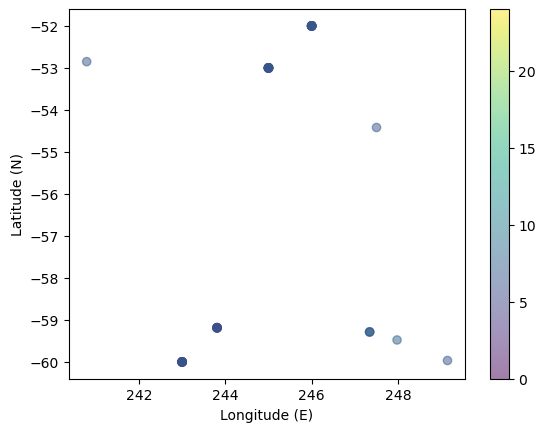

In [91]:
data = smoothmoon
lat_lims = np.argwhere((np.rad2deg(data[:, 0, :]) < -50) & (np.rad2deg(data[:, 0, :]) > -60))
long_lims = np.argwhere((np.rad2deg(data[:, 1, :]) > 240) & (np.rad2deg(data[:, 1, :]) < 250))
print(np.shape(lat_lims), np.shape(data[:, 0, :]))
# row 1 is particle #, row 2 is timestep #

overlap = np.intersect1d(lat_lims[:, 0], long_lims[:, 0])

for i in range(np.size(overlap)):
    lat_o = np.argwhere(lat_lims[:, 0] == overlap[i])
    lon_o = np.argwhere(long_lims[:, 0] == overlap[i])
    t_lat = lat_lims[lat_o, 1]
    t_lon = long_lims[lon_o, 1]
    t_overlap = np.intersect1d(t_lat,t_lon)

    print(t_overlap)
    #plt.plot(data[overlap[i], 2, t_overlap], '.')
    plt.scatter(np.rad2deg(data[overlap[i], 1, t_overlap]), np.rad2deg(data[overlap[i], 0, t_overlap]), c=data[overlap[i], 2, t_overlap], alpha=0.5, vmin=0, vmax=24)

plt.colorbar()
plt.ylabel("Latitude (N)")
plt.xlabel("Longitude (E)")
plt.show()

# per timestep, how many particles are within bounds?

    
    
    

[ 4.33333333  4.58333333  4.83333333  5.08333333  5.33333333  5.58333333
  5.83333333  6.08333333  6.33333333  6.58333333  6.83333333  7.08333333
  7.33333333  7.58333333  7.83333333  8.08333333  8.33333333  8.58333333
  8.83333333  9.08333333  9.33333333  9.58333333  9.83333333 10.08333333
 10.33333333 10.58333333 10.83333333 11.08333333 11.33333333 11.58333333
 11.83333333 12.08333333 12.33333333 12.58333333 12.83333333 13.08333333
 13.33333333 13.58333333 13.83333333 14.08333333 14.33333333 14.58333333
 14.83333333 15.08333333 15.33333333 15.58333333 15.83333333 16.08333333
 16.33333333 16.58333333 16.83333333 17.08333333 17.33333333 17.58333333
 17.83333333 18.08333333 18.33333333 18.58333333 18.83333333 19.08333333
 19.33333333 19.58333333 19.83333333 20.08333333 20.33333333 20.58333333
 20.83333333 21.08333333 21.33333333 21.58333333 21.83333333 22.08333333
 22.33333333 22.58333333 22.83333333 23.08333333 23.33333333 23.58333333
 23.83333333 24.08333333 24.33333333 24.58333333 24

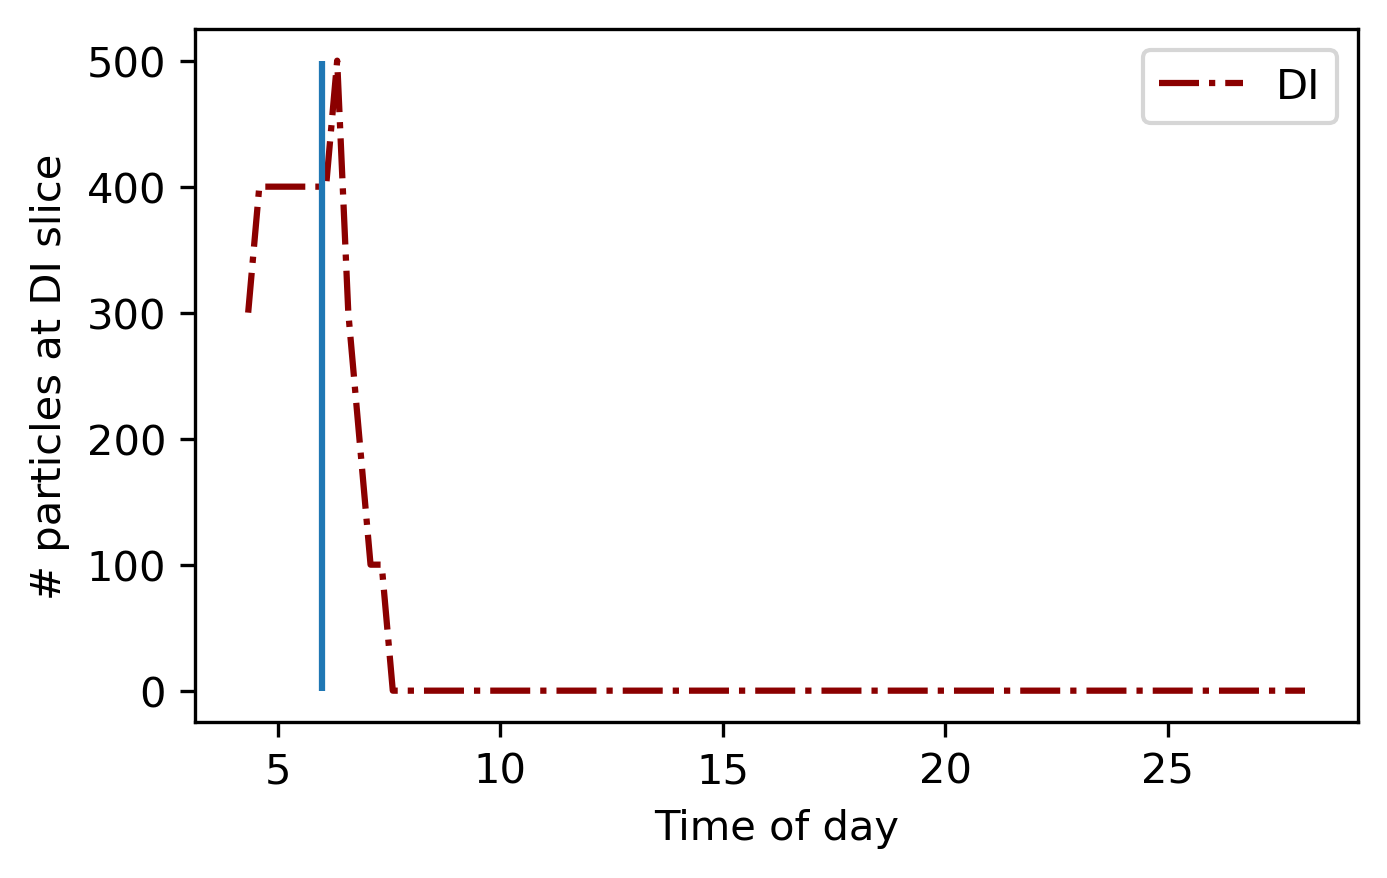

In [111]:
nsteps = 96

# DI loc transport
DI_sum, SP_sum = np.zeros((nsteps)), np.zeros((nsteps))
total = np.zeros((nsteps))
for tt in range(0, nsteps):
    DI_sum[tt] = sum((np.rad2deg(data[:, 0, tt])>=-60)&(np.rad2deg(data[:, 0, tt])<=-50)&(np.rad2deg(data[:, 1, tt])>=240)&(np.rad2deg(data[:, 1, tt])<=250))
    SP_sum[tt] = sum(np.rad2deg(data[:, 0, tt])<=-80)
    total[tt] = sum(data[:, 4, tt] == 0)

plt.figure(figsize=(5, 3), dpi=300)
tod_x = np.arange(12 - (360-245)/15, 24+(12 - (360-245)/15), 0.25)
print(tod_x)
plt.plot(tod_x, 100*DI_sum, c='darkred', label = 'DI', linestyle='dashdot')
plt.vlines(6, 0, 500)
#plt.plot(np.arange(0, nsteps, 1), 100*SP_sum, c='lightblue', label= 'SP', linestyle='dashed')
plt.ylabel('# particles at DI slice')
plt.xlabel('Time of day')
#plt.xlim((0, nsteps))
#plt.ylim((0, 10000))
plt.legend()
plt.show()

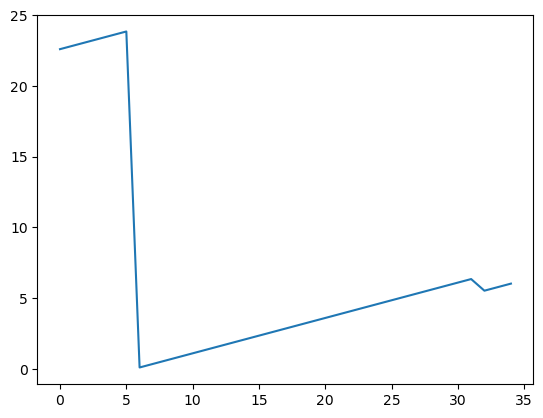

In [29]:
plt.plot(np.arange(0, 96, 1), smoothmoon[19, 2, :])

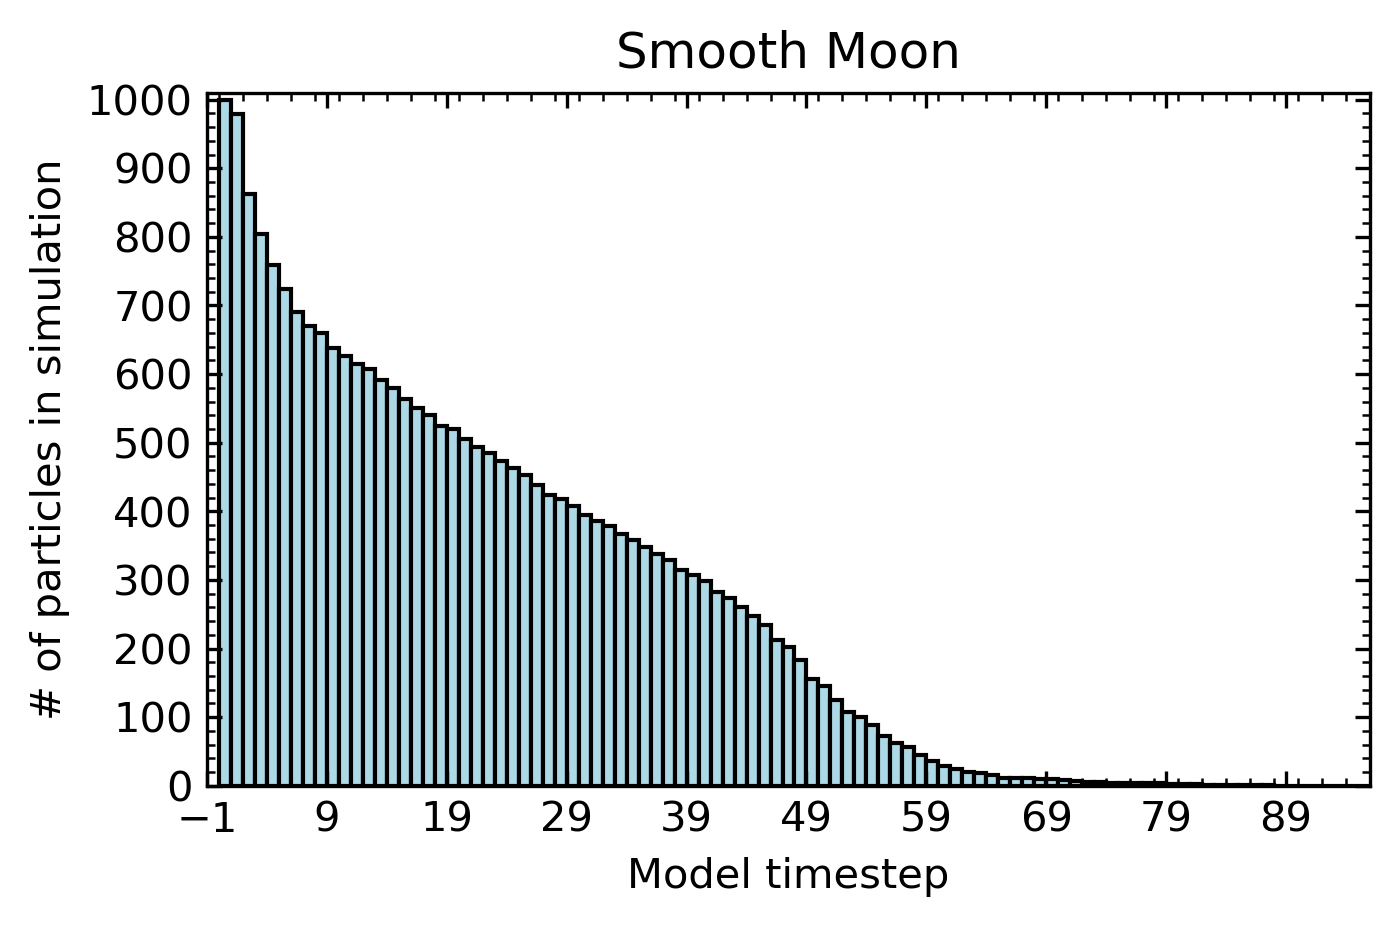

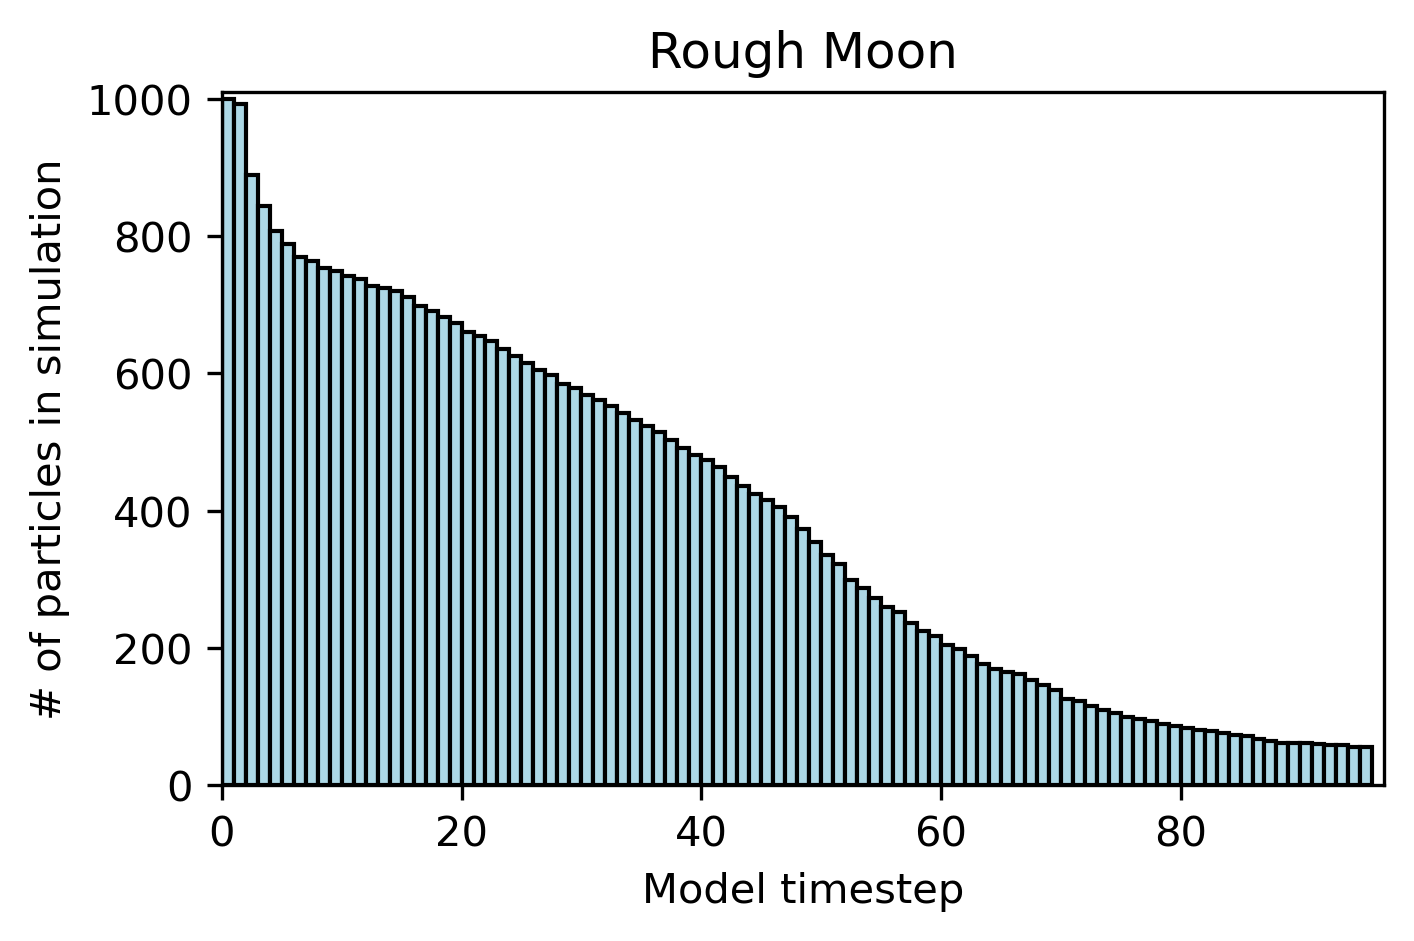

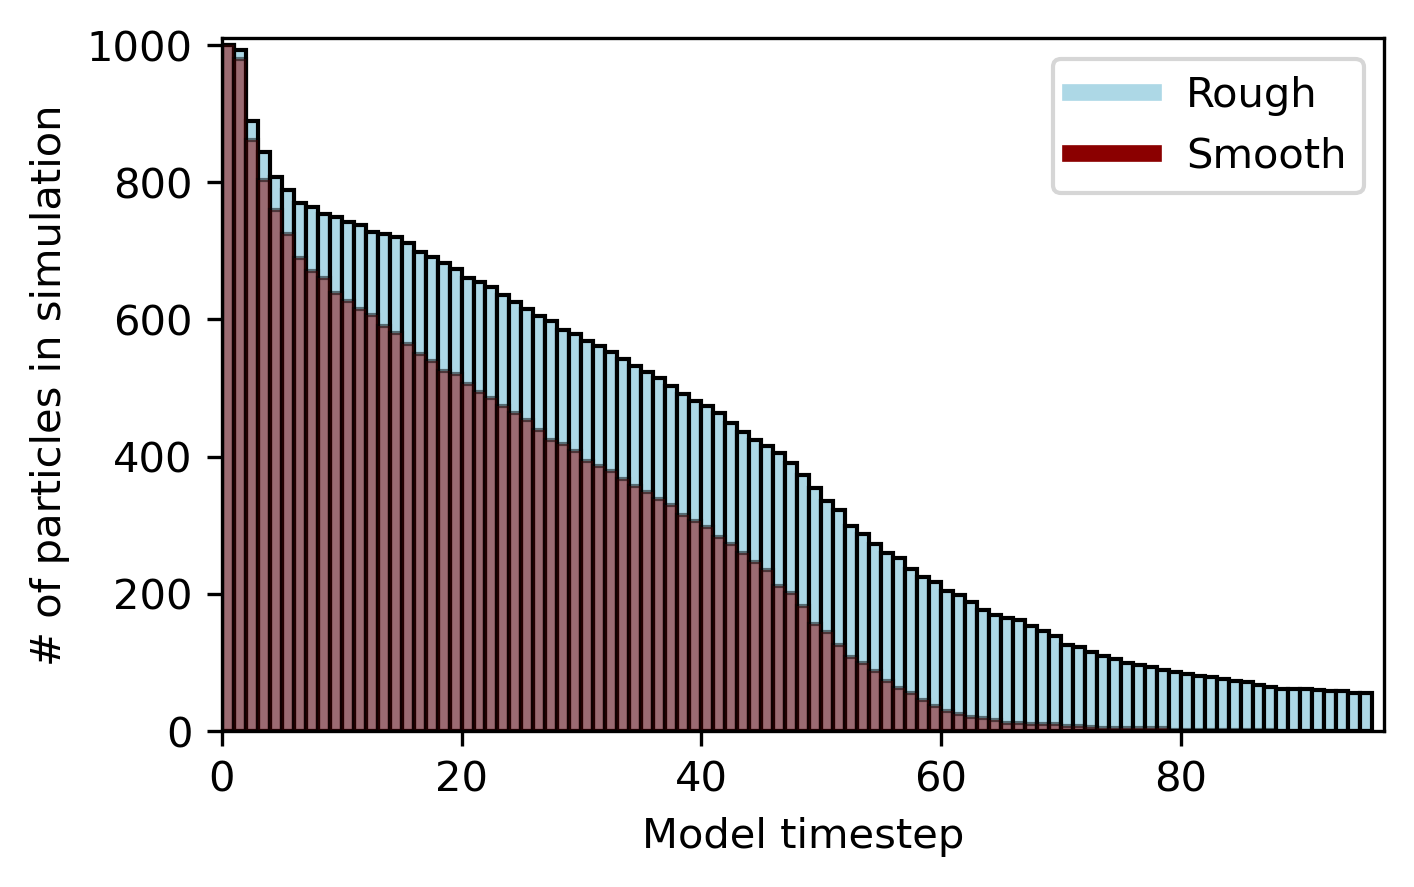

In [7]:
# survival percent through time
masks = ~np.isnan(smoothmoon[:, 4, :])
S, edgess = np.histogram(smoothmoon[:, 4, :][masks], bins=2, range=(-1, 1))
edges = np.array(edgess)[1:]

plt.figure(figsize=(5, 3), dpi= 300)
timestep = 96
for t in range(timestep):
    masks = ~np.isnan(smoothmoon[:, 4, t])
    S, edges = np.histogram(smoothmoon[:, 4, t][masks], bins=2, range=(-1, 1))
    plt.bar(t+0.5, S[1], width=1, edgecolor='k', facecolor='lightblue')

plt.yticks(np.arange(0, 1010, 100))
plt.yticks(np.arange(0, 1010, 20), minor=True)
plt.ylim((0, 1010))

plt.xticks(np.arange(-1, 96, 10))
plt.xticks(np.arange(0, 96, 2), minor=True)
plt.xlim((-1, 96))
plt.xlabel('Model timestep')
plt.ylabel('# of particles in simulation')
plt.title('Smooth Moon')

plt.tick_params(which='both', labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=True, left=True, right=True, direction='in')
plt.show()

plt.figure(figsize=(5, 3), dpi= 300)
timestep = 96
for t in range(timestep):
    maskr = ~np.isnan(roughmoon[:, 4, t])
    R, edger = np.histogram(roughmoon[:, 4, t][maskr], bins=2, range=(-1, 1))
    plt.bar(t+0.5, R[1], width=1, edgecolor='k', facecolor='lightblue')
plt.ylim((0, 1010))
plt.xlim((0, 97))
plt.xlabel('Model timestep')
plt.ylabel('# of particles in simulation')
plt.title('Rough Moon')
plt.show()


from matplotlib.lines import Line2D
custom = [Line2D([0], [0], color='lightblue', lw=4),
                Line2D([0], [0], color='darkred', lw=4)]

plt.figure(figsize=(5, 3), dpi= 300)
timestep = 96
for t in range(timestep):
    maskr = ~np.isnan(roughmoon[:, 4, t])
    R, edger = np.histogram(roughmoon[:, 4, t][maskr], bins=2, range=(-1, 1))
    plt.bar(t+0.5, R[1], width=1, edgecolor='k', facecolor='lightblue', zorder=1)
    masks = ~np.isnan(smoothmoon[:, 4, t])
    S, edges = np.histogram(smoothmoon[:, 4, t][masks], bins=2, range=(-1, 1))
    plt.bar(t+0.5, S[1], width=1, edgecolor='k', facecolor='darkred', zorder= 2, alpha=0.5)
plt.ylim((0, 1010))
plt.xlim((0, 97))
plt.xlabel('Model timestep')
plt.ylabel('# of particles in simulation')
plt.legend(custom, ['Rough', 'Smooth'])
plt.show()


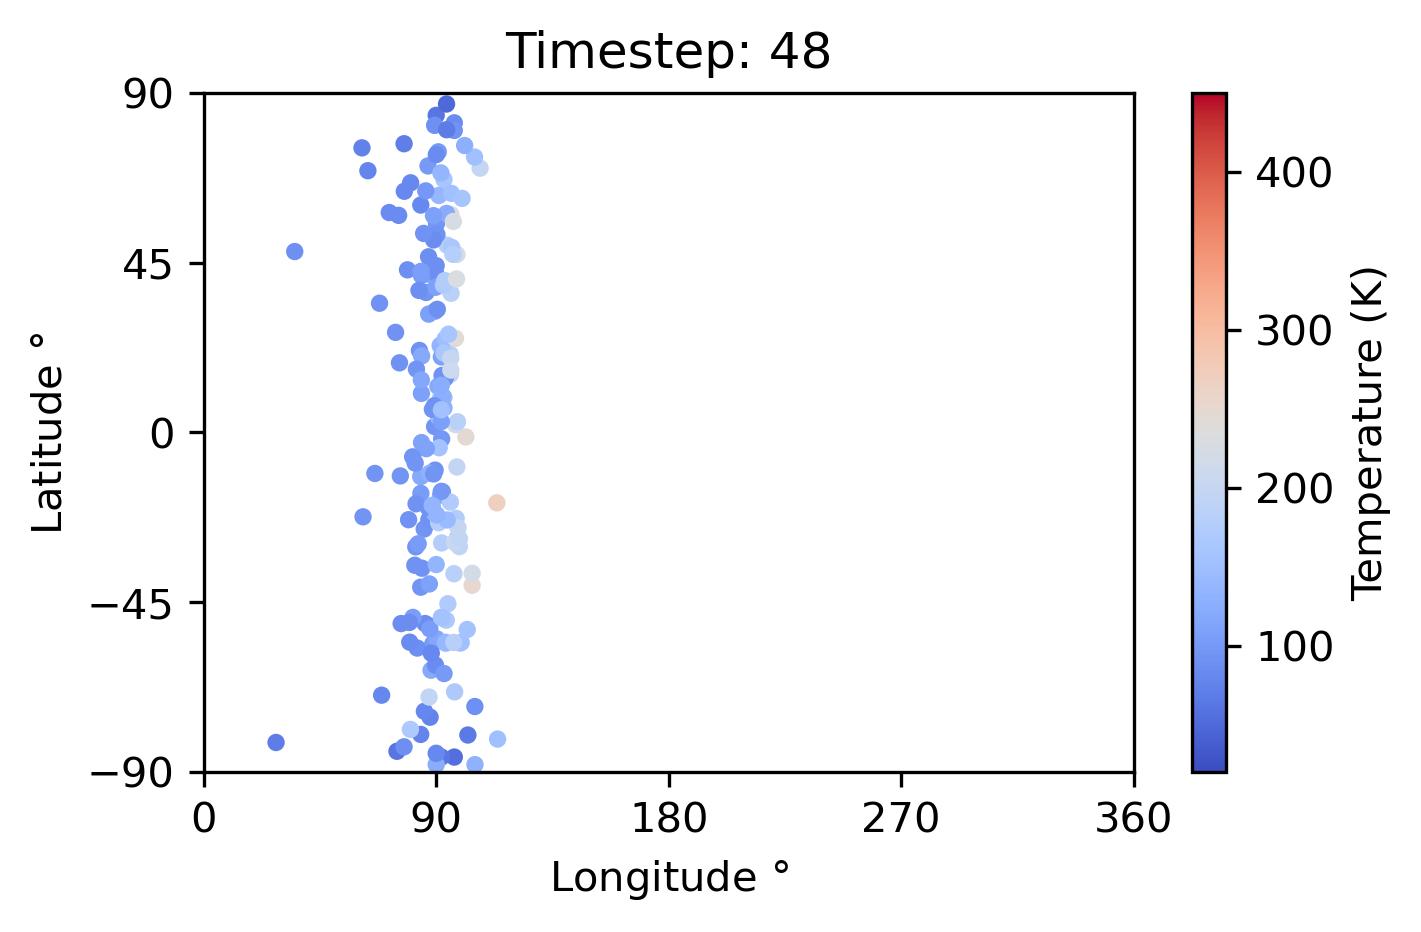

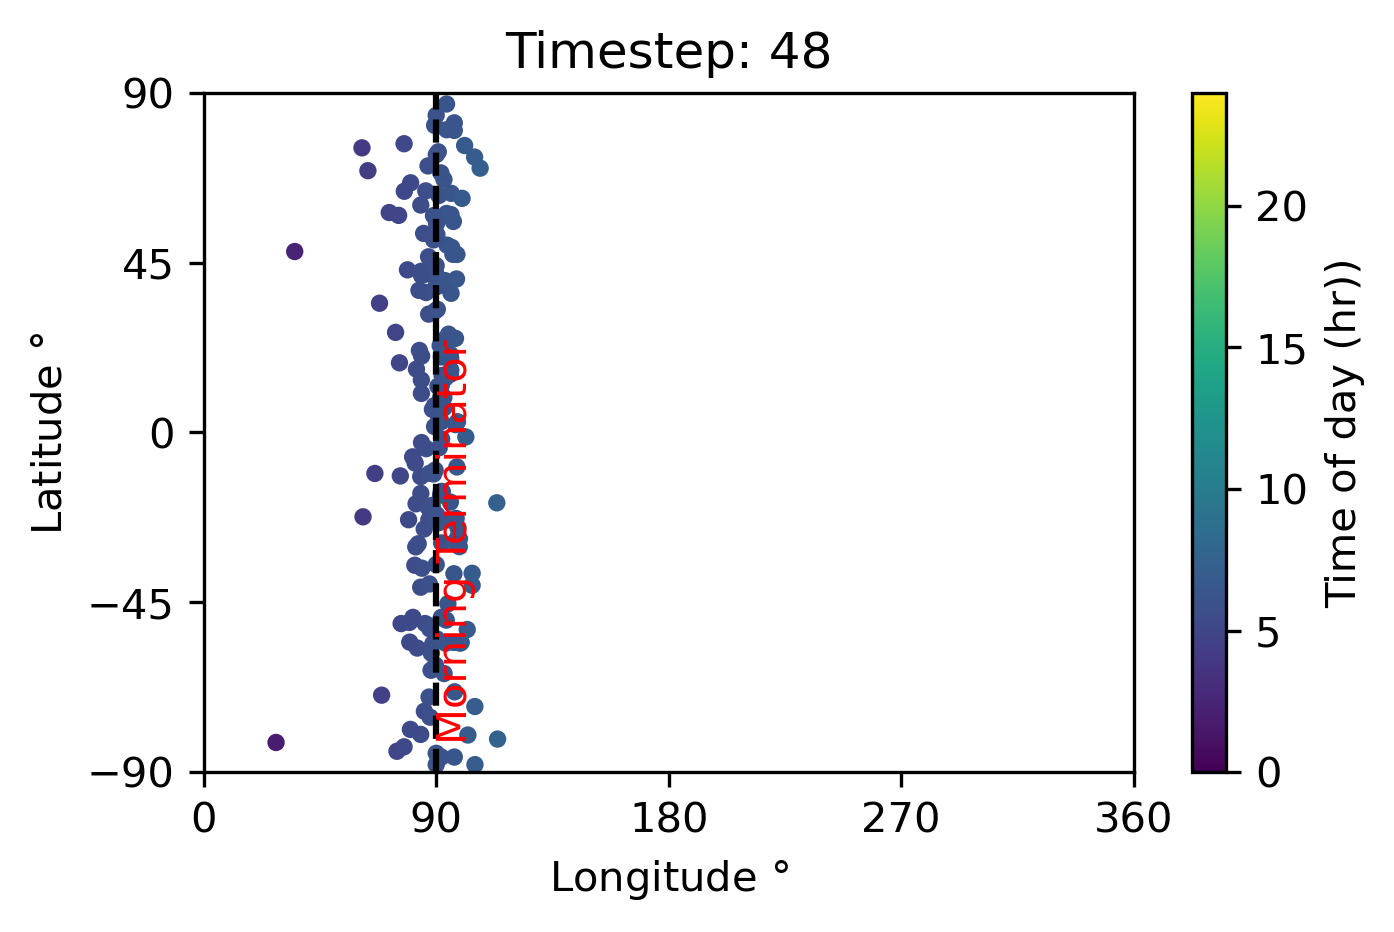

182


In [311]:
# Surface distribution
t = 48

plt.figure(figsize=(5, 3), dpi=300)
plt.scatter(np.rad2deg(smoothmoon[:, 1, t]), np.rad2deg(smoothmoon[:, 0, t]), c=smoothmoon[:, 3, t], cmap='coolwarm', s=10, vmin=20, vmax=450)
plt.colorbar(label='Temperature (K)')
plt.ylabel('Latitude $\degree$')
plt.xlabel('Longitude $\degree$')
plt.ylim((-90, 90))
plt.xlim((0, 360))
plt.yticks([-90, -45, 0, 45, 90])
plt.xticks([0, 90, 180, 270, 360])
plt.title('Timestep: %2.0f'%t)
plt.show()

plt.figure(figsize=(5, 3), dpi=300)
plt.scatter(np.rad2deg(smoothmoon[:, 1, t]), np.rad2deg(smoothmoon[:, 0, t]), c=smoothmoon[:, 2, t], cmap='viridis', s=10, vmin=0, vmax=24, zorder=0)
plt.vlines(180-t*0.25*15 + 6*15, -90, 90, colors='k', linestyle='dashed', zorder=10)
plt.annotate('Morning Terminator', (180-t*0.25*15 +6*15, -80), rotation=90, zorder=20, c='r')
plt.colorbar(label='Time of day (hr))')
plt.ylabel('Latitude $\degree$')
plt.xlabel('Longitude $\degree$')
plt.ylim((-90, 90))
plt.xlim((0, 360))
plt.yticks([-90, -45, 0, 45, 90])
plt.xticks([0, 90, 180, 270, 360])
plt.title('Timestep: %2.0f'%t)
plt.show()

print(np.sum(~np.isnan(smoothmoon[:, 2, t])))

180.0


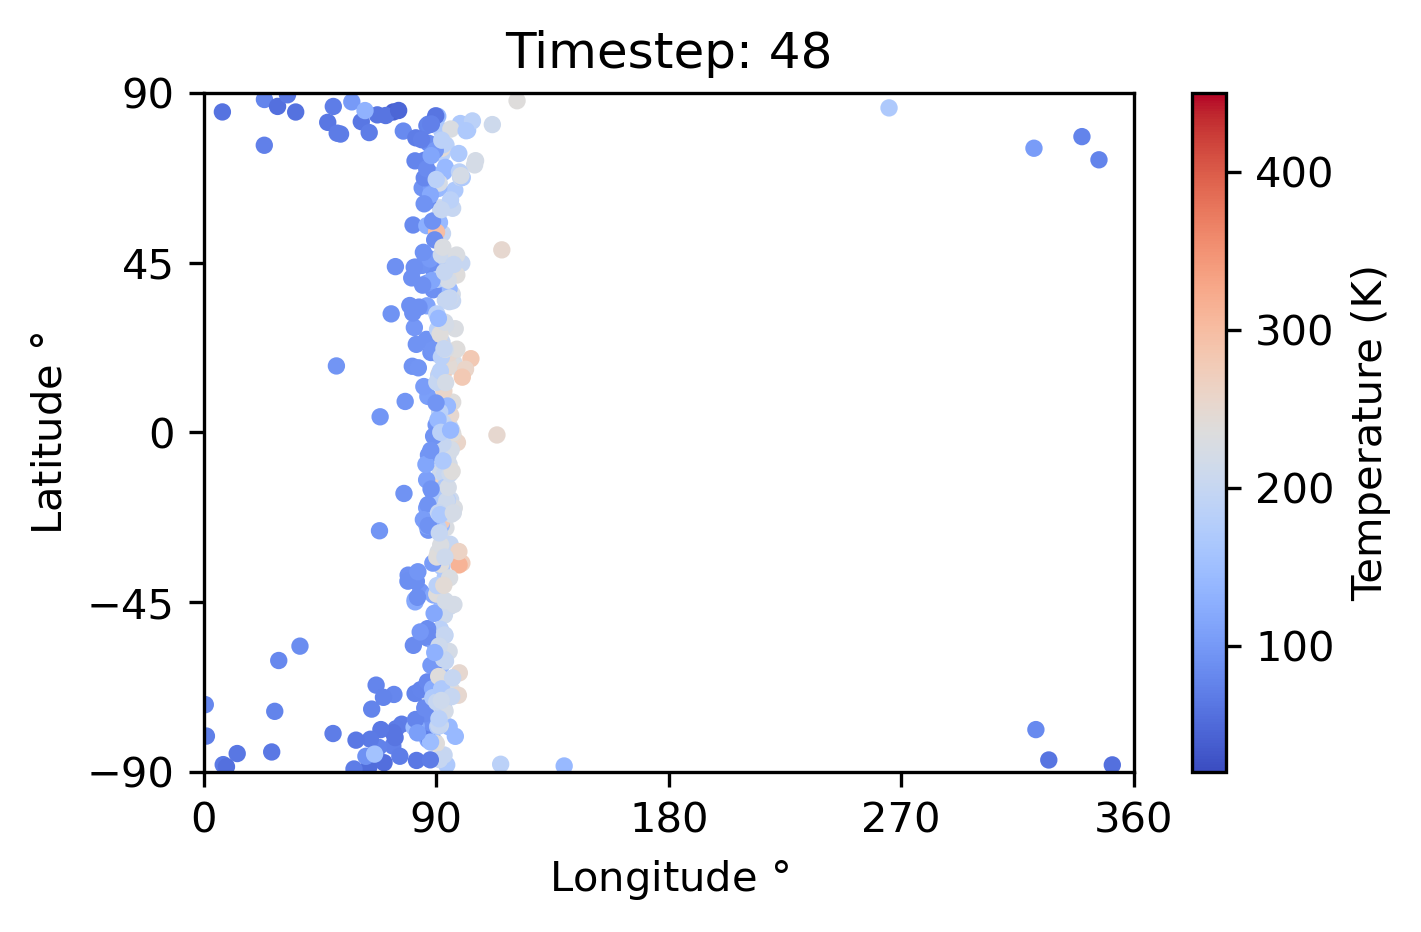

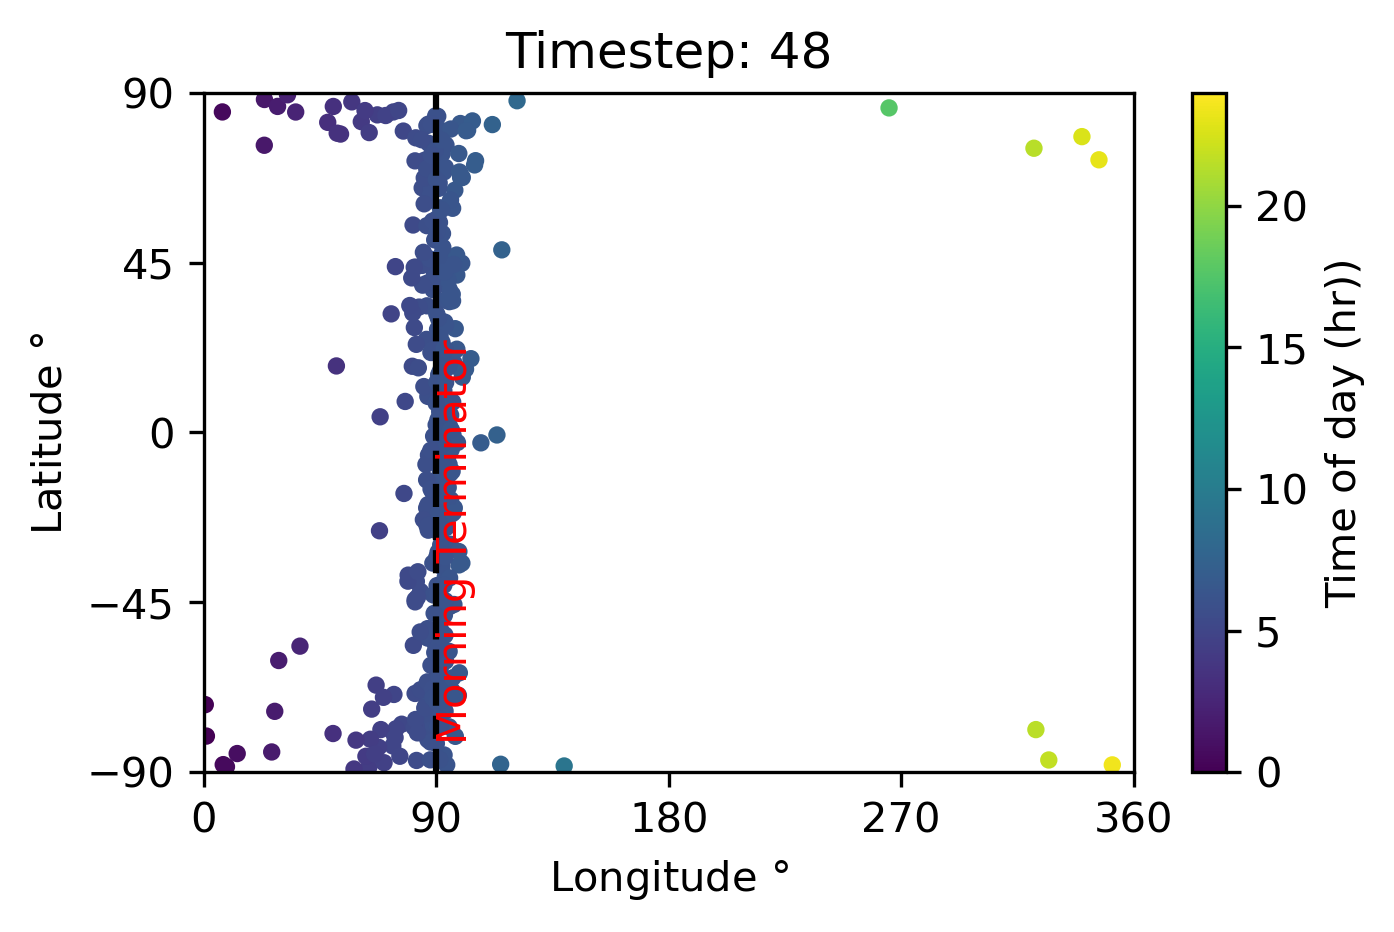

372


In [398]:
# Rough
t = 48
print(t*0.25*15)
plt.figure(figsize=(5, 3), dpi=300)
plt.scatter(np.rad2deg(roughmoon[:, 1, t]), np.rad2deg(roughmoon[:, 0, t]), c=roughmoon[:, 3, t], cmap='coolwarm', s=10, vmin=20, vmax=450)
plt.colorbar(label='Temperature (K)')
plt.ylabel('Latitude $\degree$')
plt.xlabel('Longitude $\degree$')
plt.ylim((-90, 90))
plt.xlim((0, 360))
plt.yticks([-90, -45, 0, 45, 90])
plt.xticks([0, 90, 180, 270, 360])
plt.title('Timestep: %2.0f'%t)
plt.show()

plt.figure(figsize=(5, 3), dpi=300)
plt.scatter(np.rad2deg(roughmoon[:, 1, t]), np.rad2deg(roughmoon[:, 0, t]), c=roughmoon[:, 2, t], cmap='viridis', s=10, vmin=0, vmax=24, zorder=0)
plt.vlines(180-t*0.25*15 + 6*15, -90, 90, colors='k', linestyle='dashed', zorder=10)
if t > 71:
    plt.vlines(270-(t-72)*0.25*15 + 6*15, -90, 90, colors='k', linestyle='dashed', zorder=10)

plt.annotate('Morning Terminator', (180-t*0.25*15 +6*15, -80), rotation=90, zorder=20, c='r')
plt.colorbar(label='Time of day (hr))')
plt.ylabel('Latitude $\degree$')
plt.xlabel('Longitude $\degree$')
plt.ylim((-90, 90))
plt.xlim((0, 360))
plt.yticks([-90, -45, 0, 45, 90])
plt.xticks([0, 90, 180, 270, 360])
plt.title('Timestep: %2.0f'%t)
plt.show()

print(np.sum(~np.isnan(roughmoon[:, 2, t])))

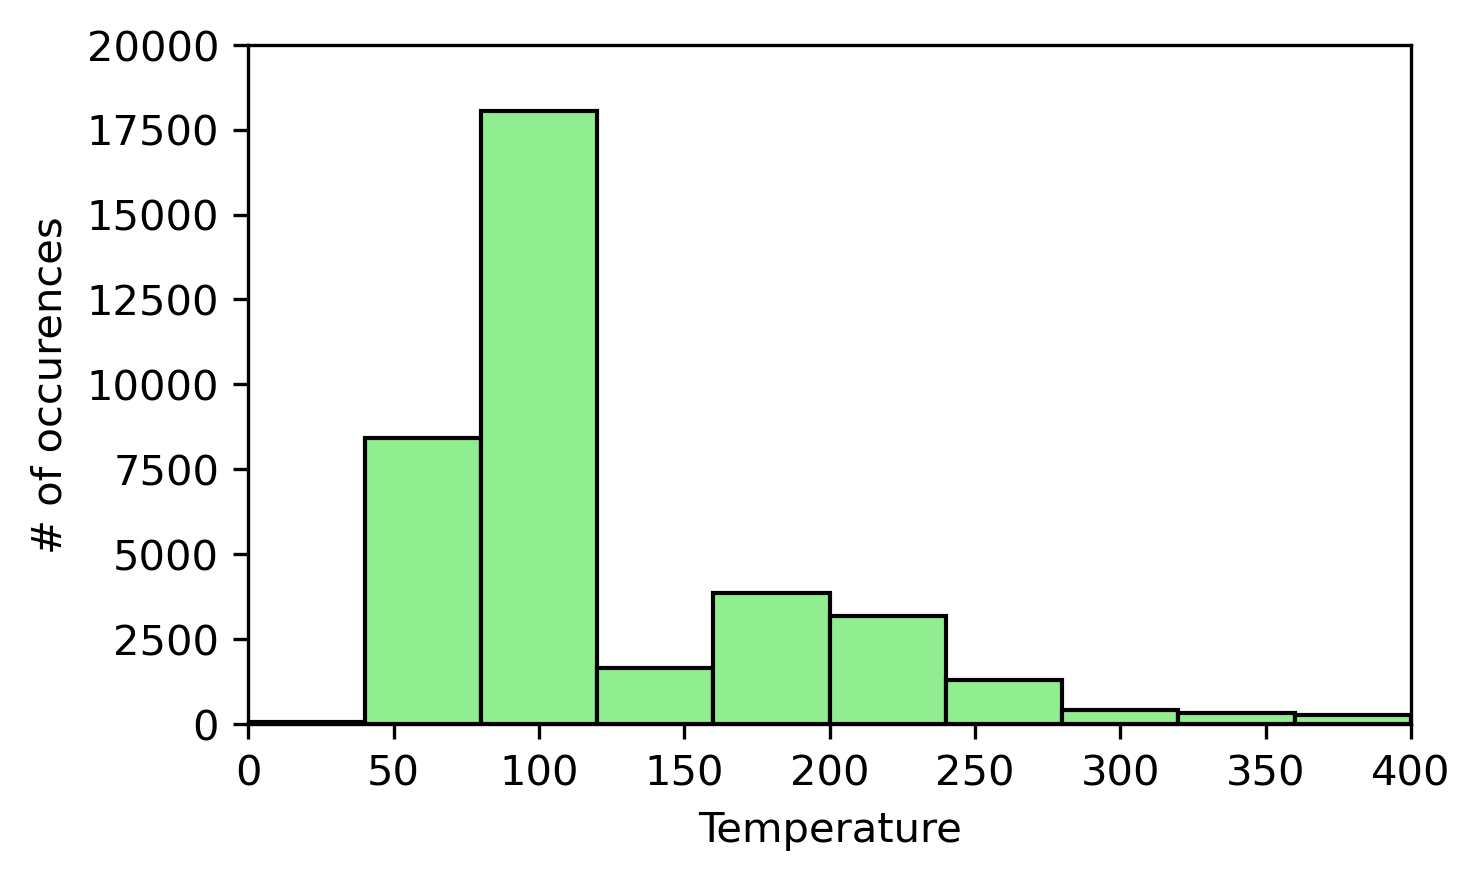

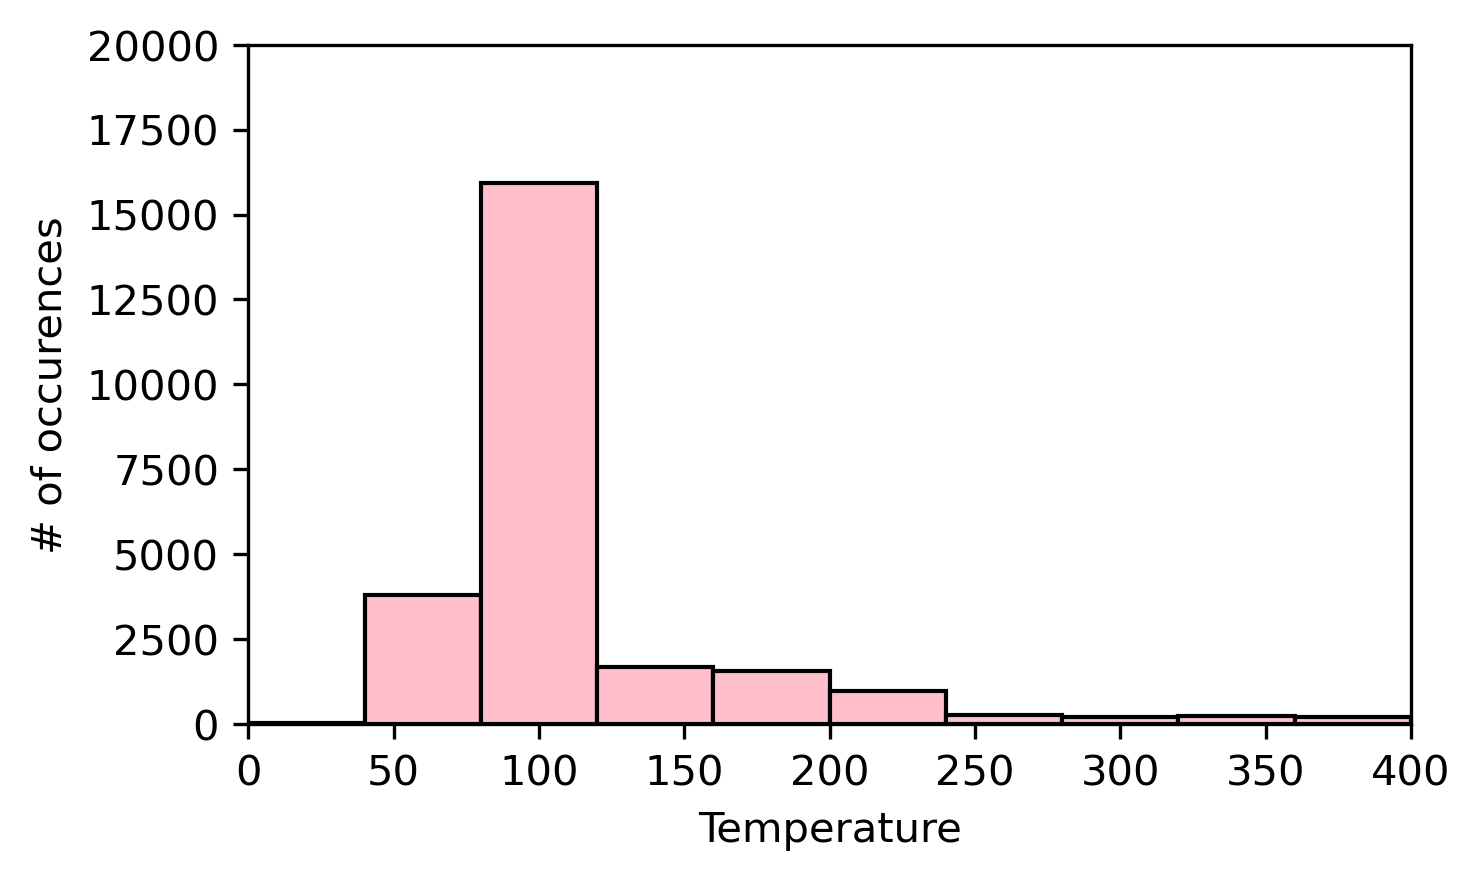

In [98]:
# Histogram of temperature in model (all particles, all timesteps)

maskr = ~np.isnan(roughmoon[:, 3, :])
Hr, edgesr = np.histogram(roughmoon[:, 3, :][maskr], bins=10, range=(0, 400))
edged = np.array(edgesr)[1:]
plt.figure(figsize=(5, 3), dpi=300)
plt.bar(edged-20, Hr, width = edged[2]-edged[1], align='center', facecolor='lightgreen', edgecolor='k')
plt.ylim((0, 20000))
plt.xlim((0, 400))
plt.ylabel('# of occurences')
plt.xlabel('Temperature')
plt.show()

mask = ~np.isnan(smoothmoon[:, 3, :])
H, edges = np.histogram(smoothmoon[:, 3, :][mask], bins=10, range=(0, 400))
edge = np.array(edges)[1:]
plt.figure(figsize=(5, 3), dpi=300)
plt.bar(edge-20, H, width = edge[2]-edge[1], align='center', facecolor='pink', edgecolor='k')
plt.ylim((0, 20000))
plt.xlim((0, 400))
plt.ylabel('# of occurences')
plt.xlabel('Temperature')
plt.show()

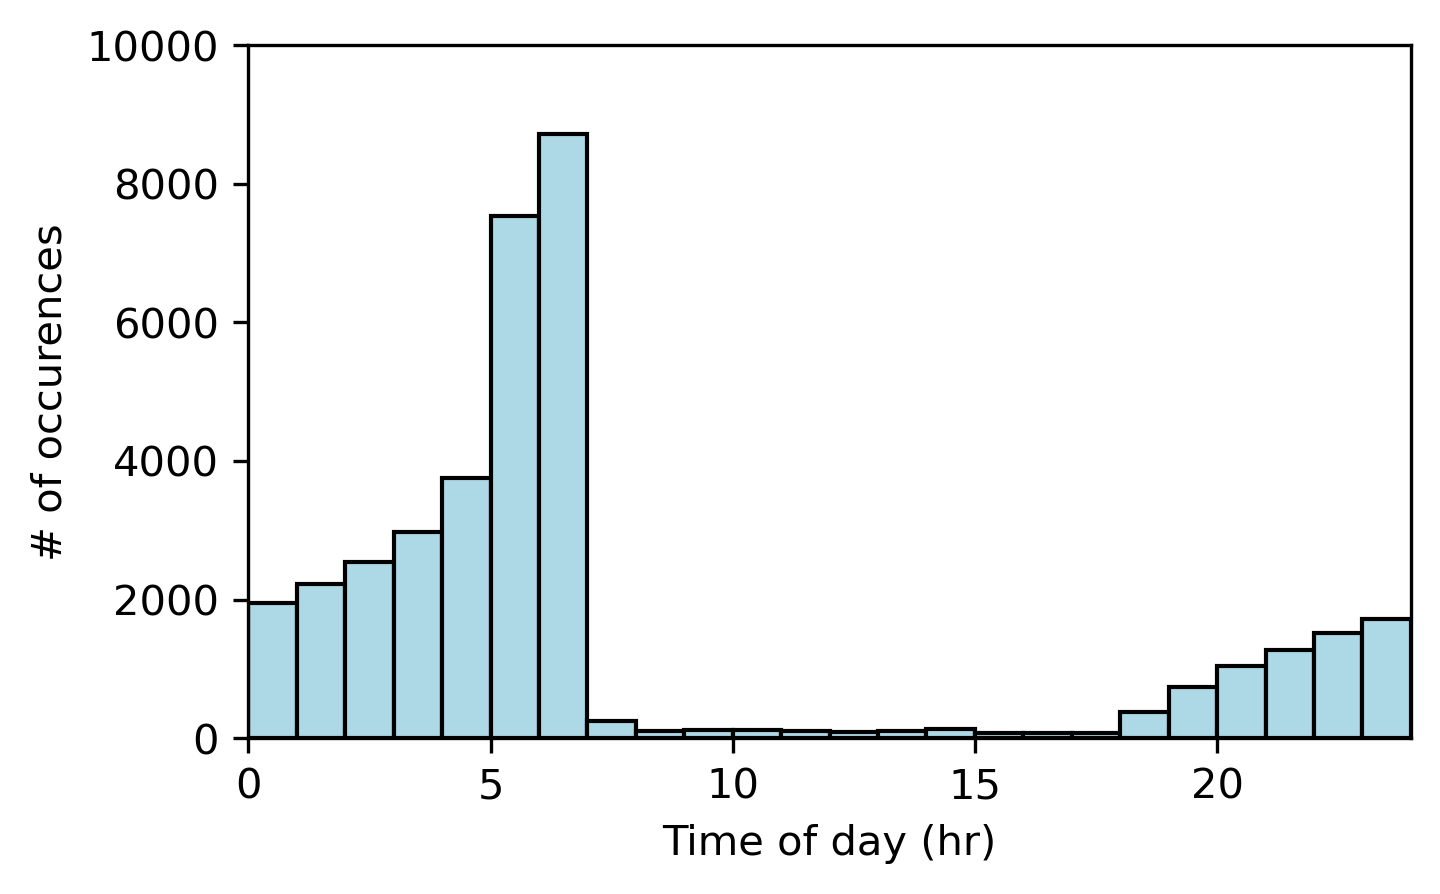

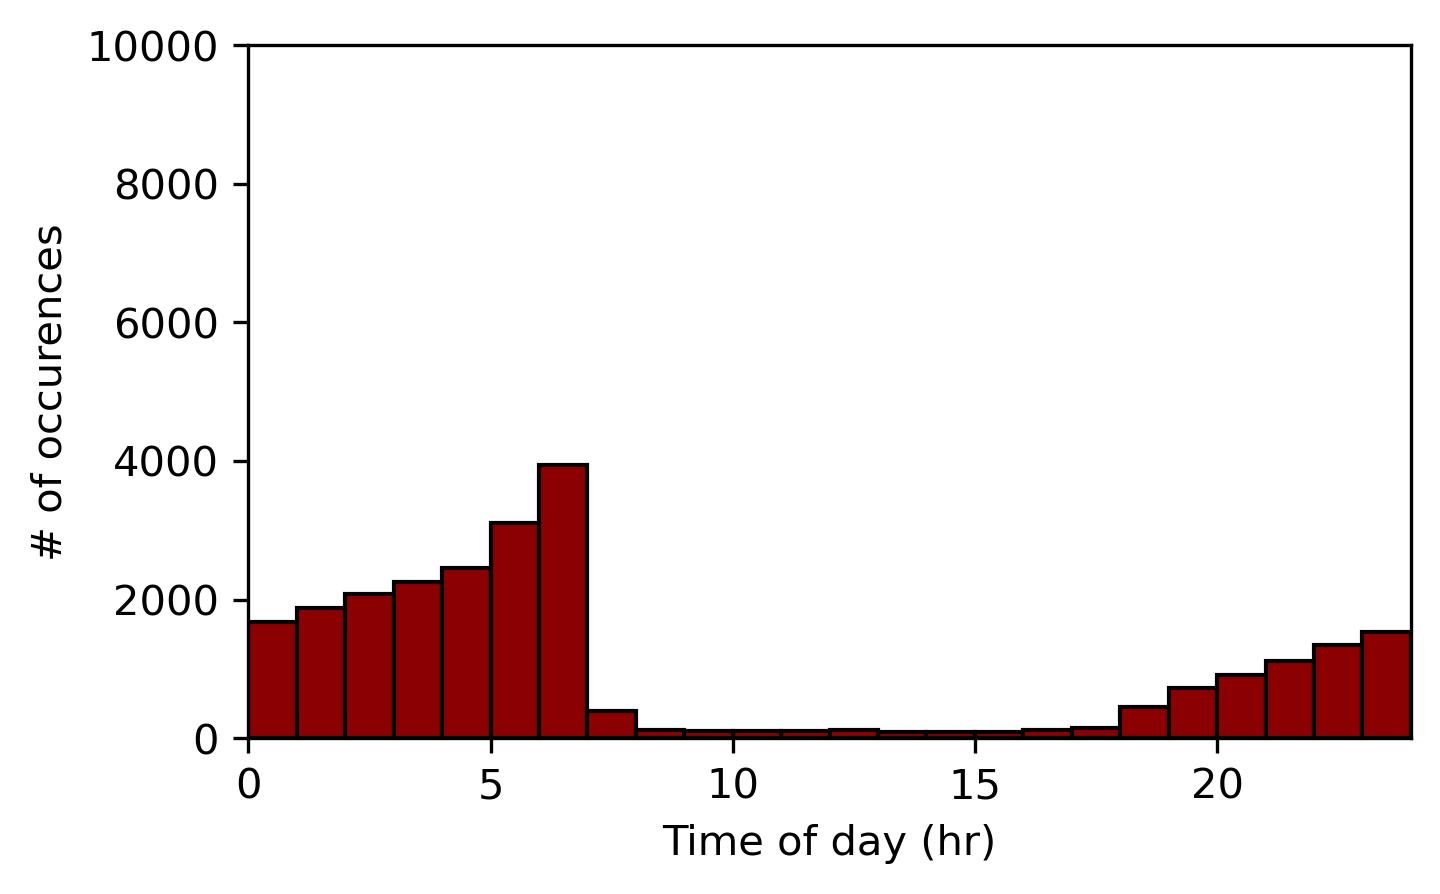

In [834]:
# Histogram of time of day in model (all particles, all timesteps)

maskr = ~np.isnan(roughmoon[:, 2, :])
Hr, edgesr = np.histogram(roughmoon[:, 2, :][maskr], bins=24, range=(0, 24))
edged = np.array(edgesr)[1:]
plt.figure(figsize=(5, 3), dpi=300)
plt.bar(edged-0.5, Hr, width = edged[2]-edged[1], align='center', facecolor='lightblue', edgecolor='k')
plt.ylim((0, 10000))
plt.xlim((0, 24))
plt.ylabel('# of occurences')
plt.xlabel('Time of day (hr)')
plt.show()

mask = ~np.isnan(smoothmoon[:, 2, :])
H, edges = np.histogram(smoothmoon[:, 2, :][mask], bins=24, range=(0, 24))
edge = np.array(edges)[1:]
plt.figure(figsize=(5, 3), dpi=300)
plt.bar(edge-0.5, H, width = edge[2]-edge[1], align='center', facecolor='darkred', edgecolor='k')
plt.ylim((0, 10000))
plt.xlim((0, 24))
plt.ylabel('# of occurences')
plt.xlabel('Time of day (hr)')
plt.show()

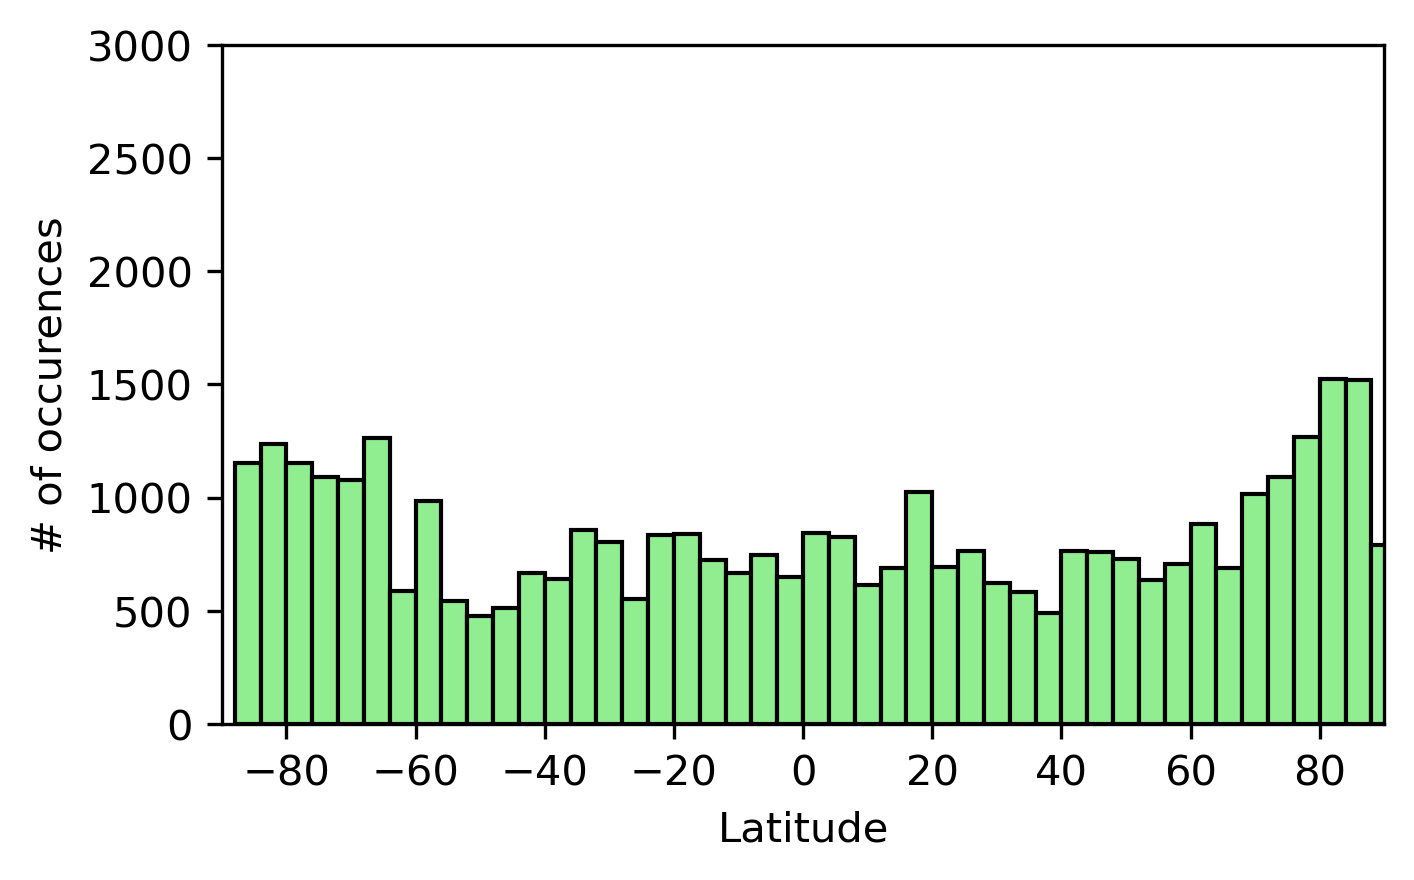

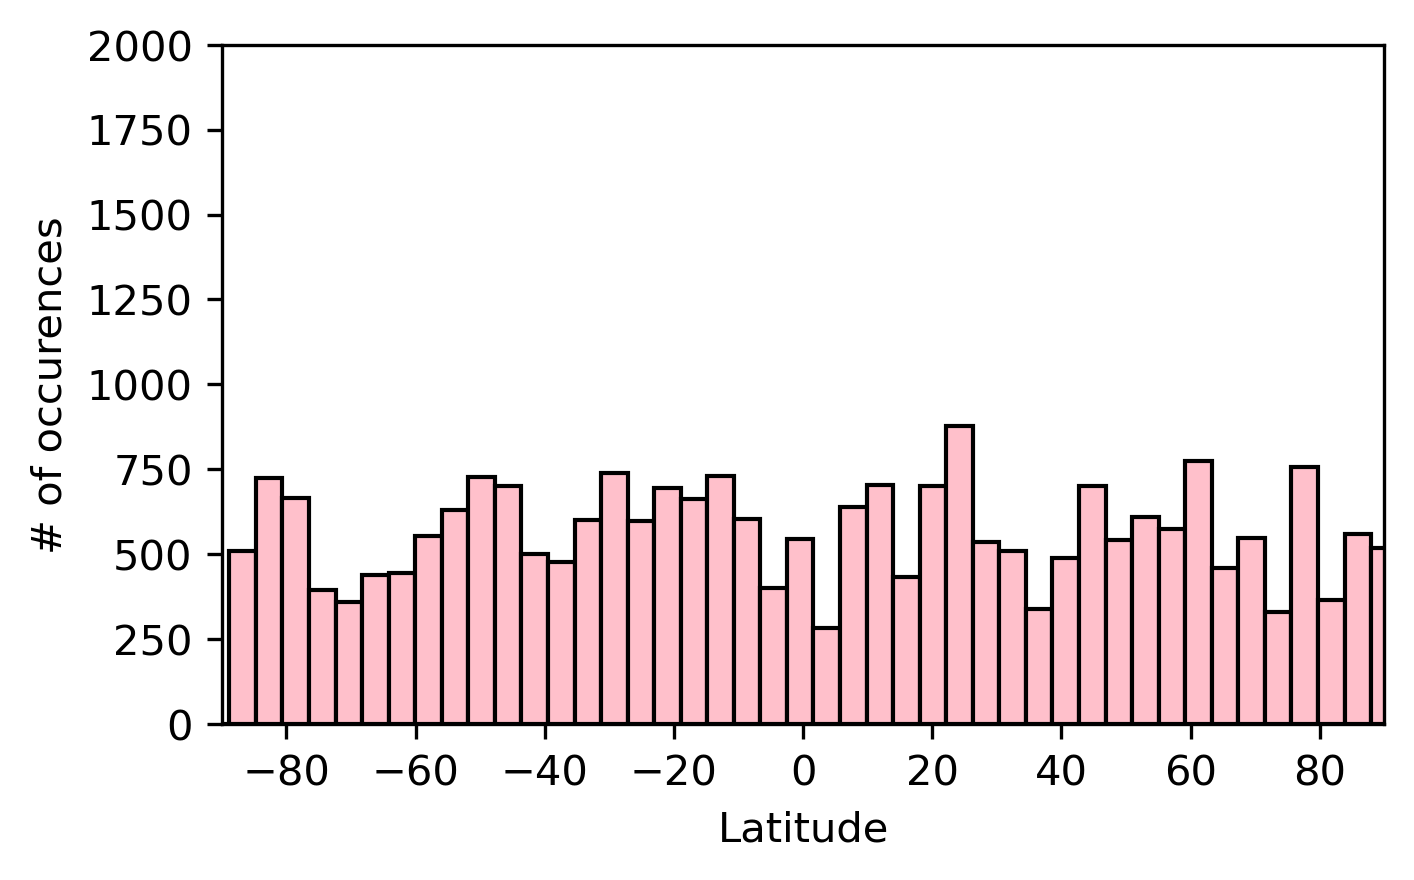

In [219]:
# Histogram of latitude in model (all particles, all timesteps)

maskr = ~np.isnan(roughmoon[:, 0, :])
Hr, edgesr = np.histogram(np.rad2deg(roughmoon[:, 0, :])[maskr], bins=45, range=(-90, 90))
edged = np.array(edgesr)[1:]
plt.figure(figsize=(5, 3), dpi=300)
plt.bar(edged, Hr, width = edged[2]-edged[1], align='center', facecolor='lightgreen', edgecolor='k')
plt.ylim((0, 3000))
plt.xlim((-90, 90))
plt.ylabel('# of occurences')
plt.xlabel('Latitude')
plt.show()

mask = ~np.isnan(smoothmoon[:, 0, :])
H, edges = np.histogram(np.rad2deg(smoothmoon[:, 0, :])[mask], bins=45, range=(-95, 90))
edge = np.array(edges)[1:]
plt.figure(figsize=(5, 3), dpi=300)
plt.bar(edge, H, width = edge[2]-edge[1], align='center', facecolor='pink', edgecolor='k')
plt.ylim((0, 2000))
plt.xlim((-90, 90))
plt.ylabel('# of occurences')
plt.xlabel('Latitude')
plt.show()

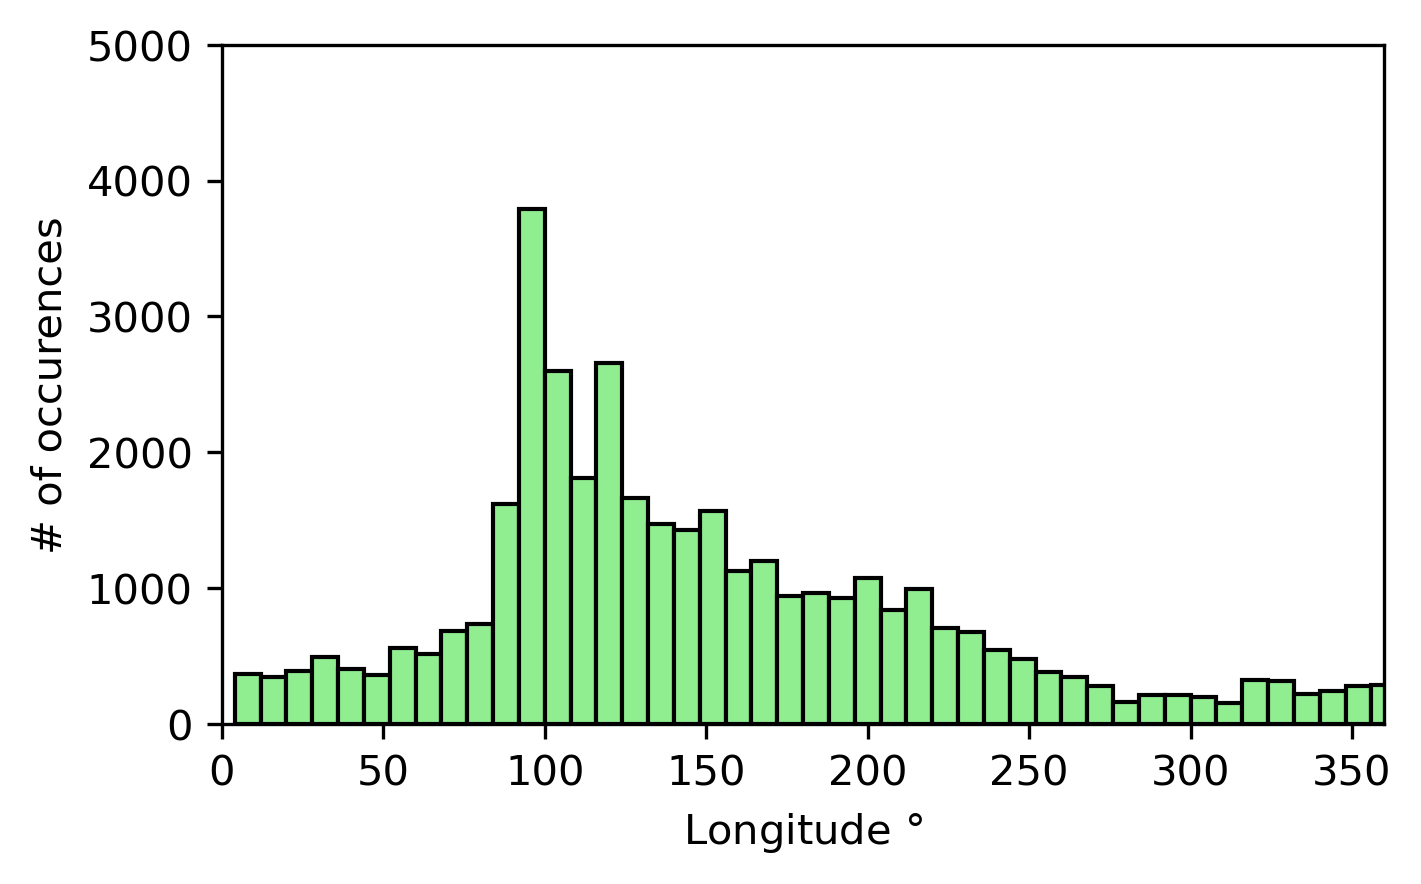

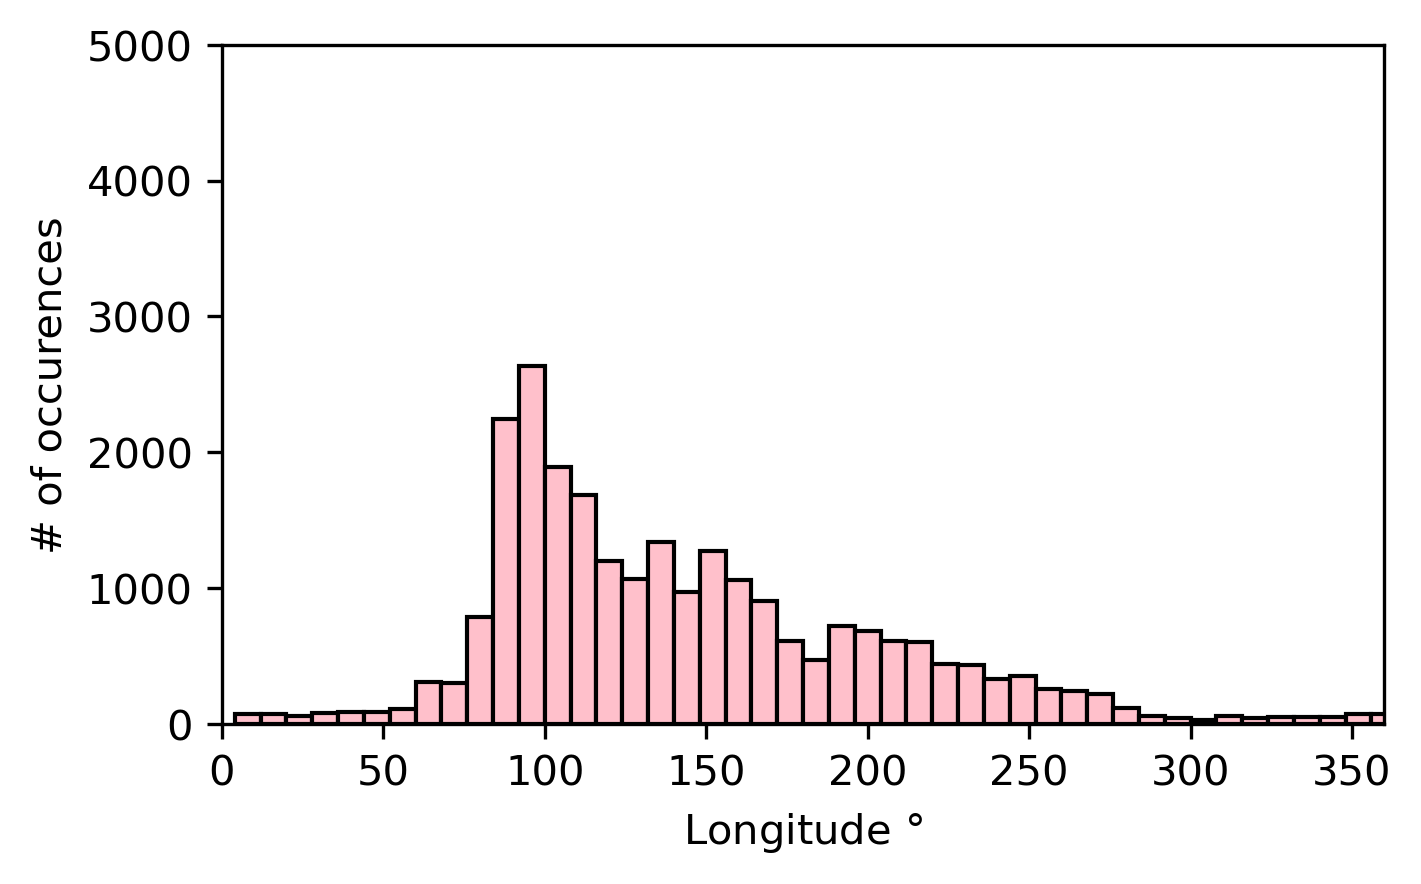

In [224]:
# Histogram of longitude in model (all particles, all timesteps)

maskr = ~np.isnan(roughmoon[:, 1, :])
Hr, edgesr = np.histogram(np.rad2deg(roughmoon[:, 1, :])[maskr], bins=45, range=(0, 360))
edged = np.array(edgesr)[1:]
plt.figure(figsize=(5, 3), dpi=300)
plt.bar(edged, Hr, width = edged[2]-edged[1], align='center', facecolor='lightgreen', edgecolor='k')
plt.ylim((0, 5000))
plt.xlim((0, 360))
plt.ylabel('# of occurences')
plt.xlabel('Longitude $\degree$')
plt.show()

mask = ~np.isnan(smoothmoon[:, 1, :])
H, edges = np.histogram(np.rad2deg(smoothmoon[:,1, :])[mask], bins=45, range=(0, 360))
edge = np.array(edges)[1:]
plt.figure(figsize=(5, 3), dpi=300)
plt.bar(edge, H, width = edge[2]-edge[1], align='center', facecolor='pink', edgecolor='k')
plt.ylim((0, 5000))
plt.xlim((0, 360))
plt.ylabel('# of occurences')
plt.xlabel('Longitude $\degree$')
plt.show()

[33946  1191   549   195   125    95    58    32    59    20    29    48
    49    93    79    60    54    14     9     1] [   0.  250.  500.  750. 1000. 1250. 1500. 1750. 2000. 2250. 2500. 2750.
 3000. 3250. 3500. 3750. 4000. 4250. 4500. 4750. 5000.]


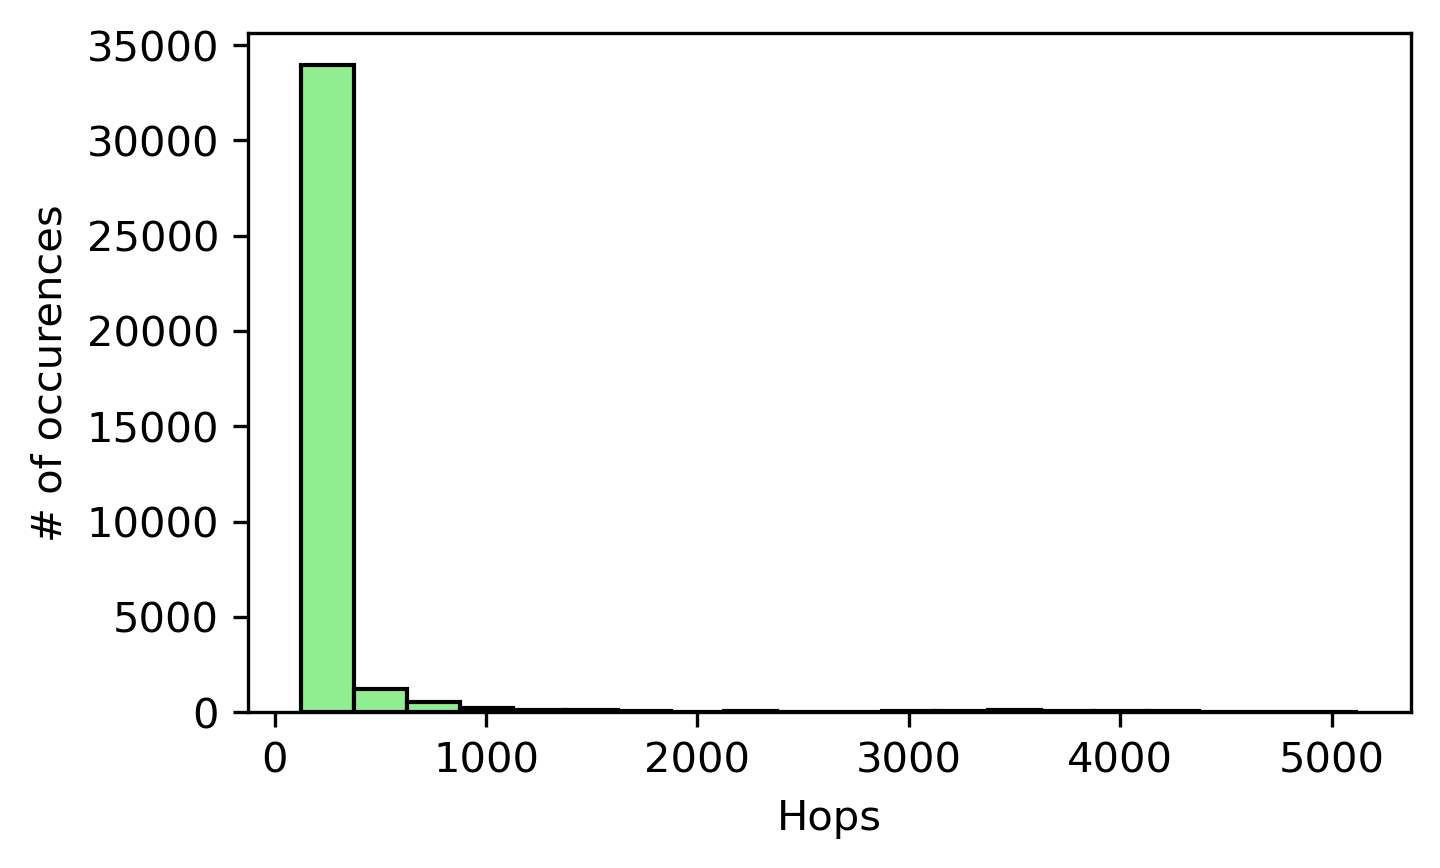

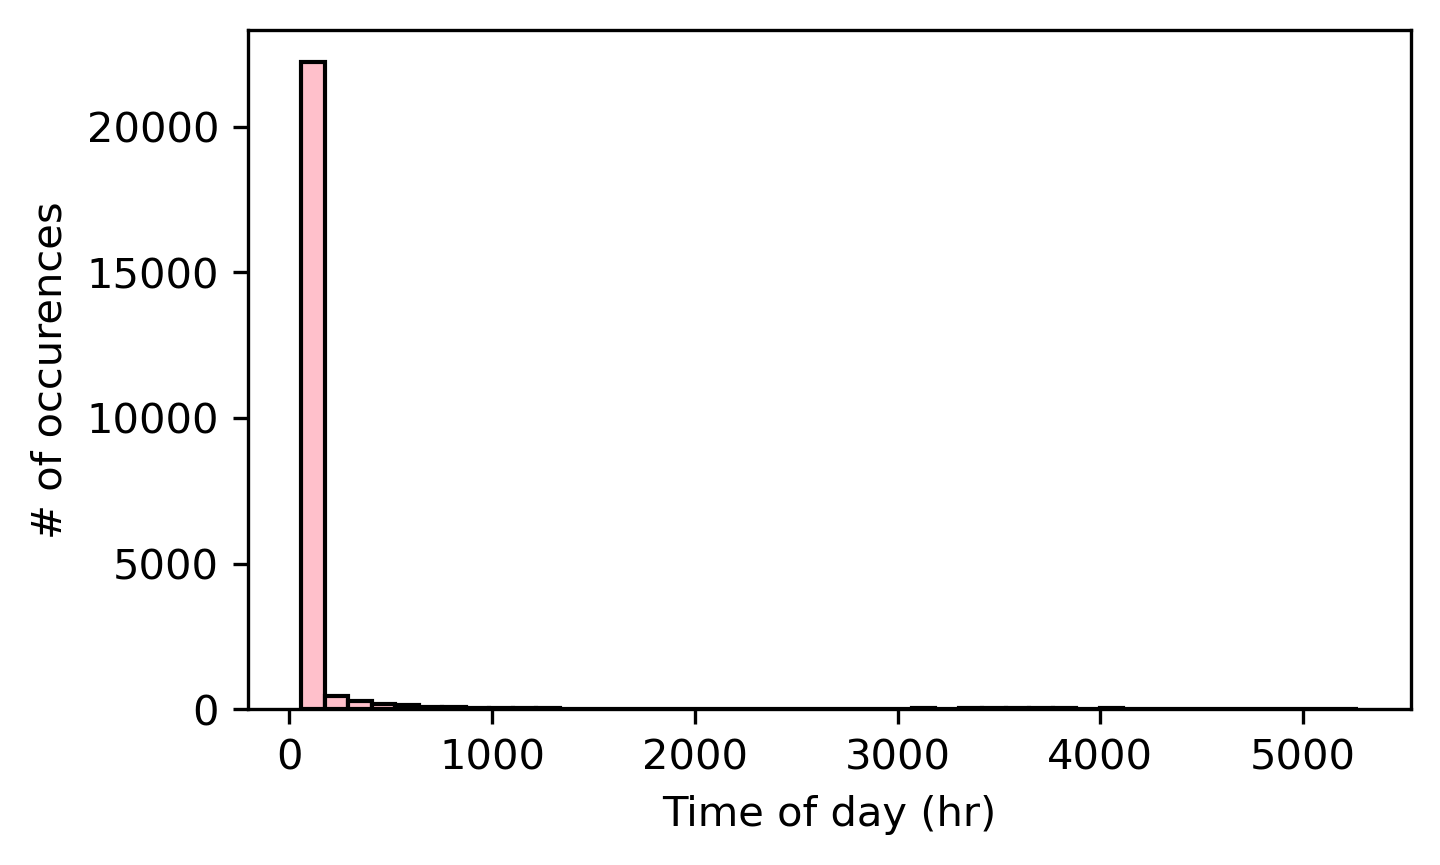

In [248]:
# Histogram of latitude in model (all particles, all timesteps)

maskr = ~np.isnan(roughmoon[:, 6, :])
Hr, edgesr = np.histogram(np.rad2deg(roughmoon[:, 6, :])[maskr], bins=20, range=(0, 5000))
edged = np.array(edgesr)[1:]
plt.figure(figsize=(5, 3), dpi=300)
plt.bar(edged, Hr, width = edged[2]-edged[1], align='center', facecolor='lightgreen', edgecolor='k')
#plt.ylim((0, 3000))
#plt.xlim((-90, 90))
plt.ylabel('# of occurences')
plt.xlabel('Hops')
plt.show()

mask = ~np.isnan(smoothmoon[:, 6, :])
H, edges = np.histogram(np.rad2deg(smoothmoon[:, 6, :])[mask], bins=45) #, range=(-95, 90))
edge = np.array(edges)[1:]
plt.figure(figsize=(5, 3), dpi=300)
plt.bar(edge, H, width = edge[2]-edge[1], align='center', facecolor='pink', edgecolor='k')
#plt.ylim((0, 2000))
#plt.xlim((-90, 90))
plt.ylabel('# of occurences')
plt.xlabel('Time of day (hr)')
plt.show()


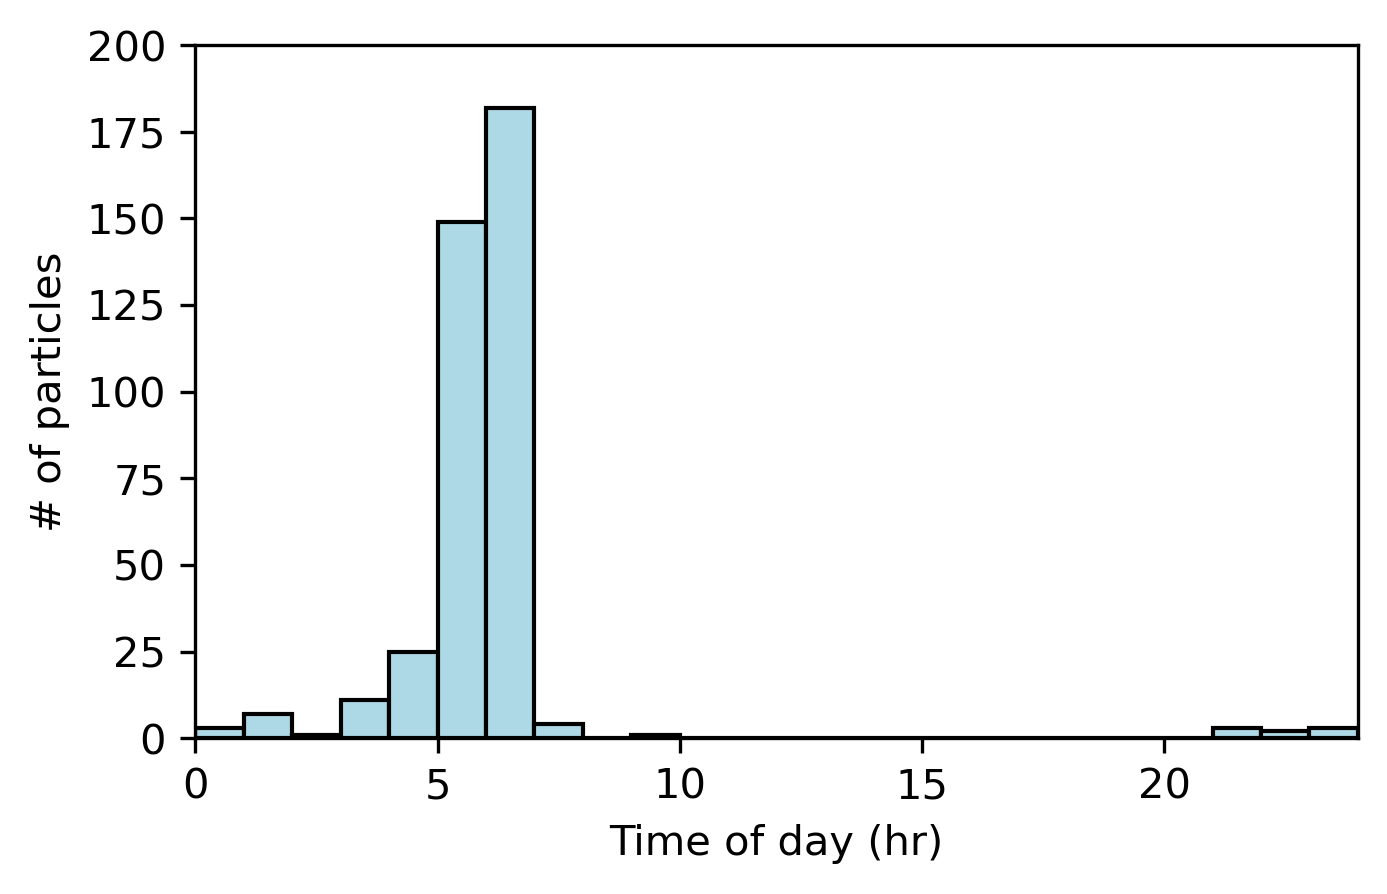

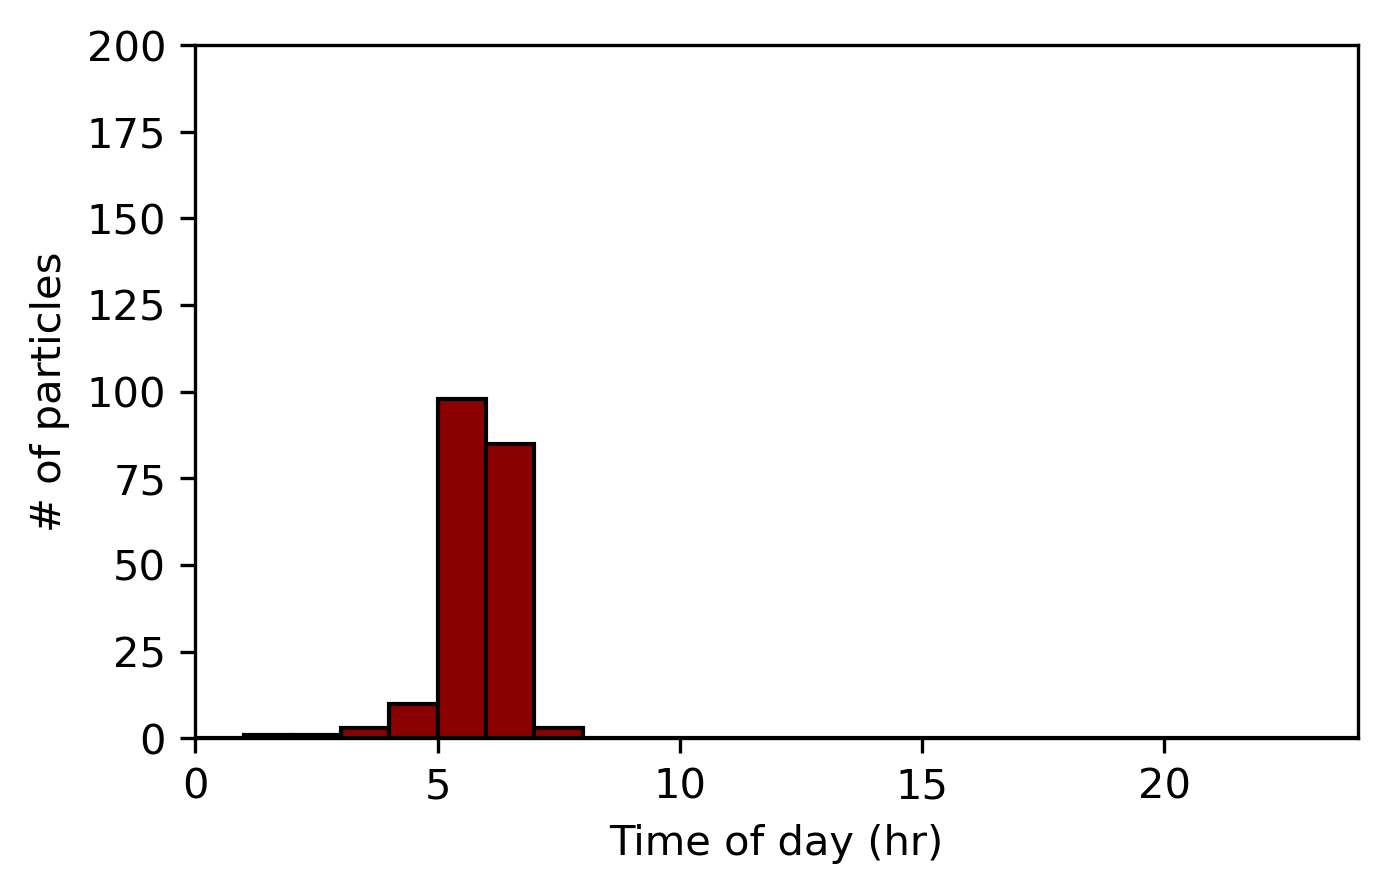

In [837]:
# at a single timestep, what is the distribution like?
tt = 47

maskr = ~np.isnan(roughmoon[:, 2, tt])
Hr, edgesr = np.histogram(roughmoon[:, 2, tt][maskr], bins=24, range=(0, 24))
edged = np.array(edgesr)[1:]
plt.figure(figsize=(5, 3), dpi=300)
plt.bar(edged-0.5, Hr, width = edged[2]-edged[1], align='center', facecolor='lightblue', edgecolor='k')
plt.ylim((0, 200))
plt.xlim((0, 24))
plt.ylabel('# of particles')
plt.xlabel('Time of day (hr)')
plt.show()

mask = ~np.isnan(smoothmoon[:, 2, tt])
H, edges = np.histogram(smoothmoon[:, 2, tt][mask], bins=24, range=(0, 24))
edge = np.array(edges)[1:]
plt.figure(figsize=(5, 3), dpi=300)
plt.bar(edge-0.5, H, width = edge[2]-edge[1], align='center', facecolor='darkred', edgecolor='k')
plt.ylim((0, 200))
plt.xlim((0, 24))
plt.ylabel('# of particles')
plt.xlabel('Time of day (hr)')
plt.show()



In [ ]:
# plot the north pole at time tt

tt = 40
fig = plt.figure(figsize=(10, 6), dpi=100)
ax2 = fig.add_subplot(projection='polar')
c2 = ax2.scatter(roughmoon[:, 1, tt], np.rad2deg(roughmoon[:, 0, tt]), c=roughmoon[:, 3, tt], cmap='viridis', vmin=0, vmax=250, zorder=10)
ax2.set_rticks([85, 87, 90])
ax2.set_ylim(90, 84)
plt.colorbar(c2, label='Temperature (K)')

plt.show()

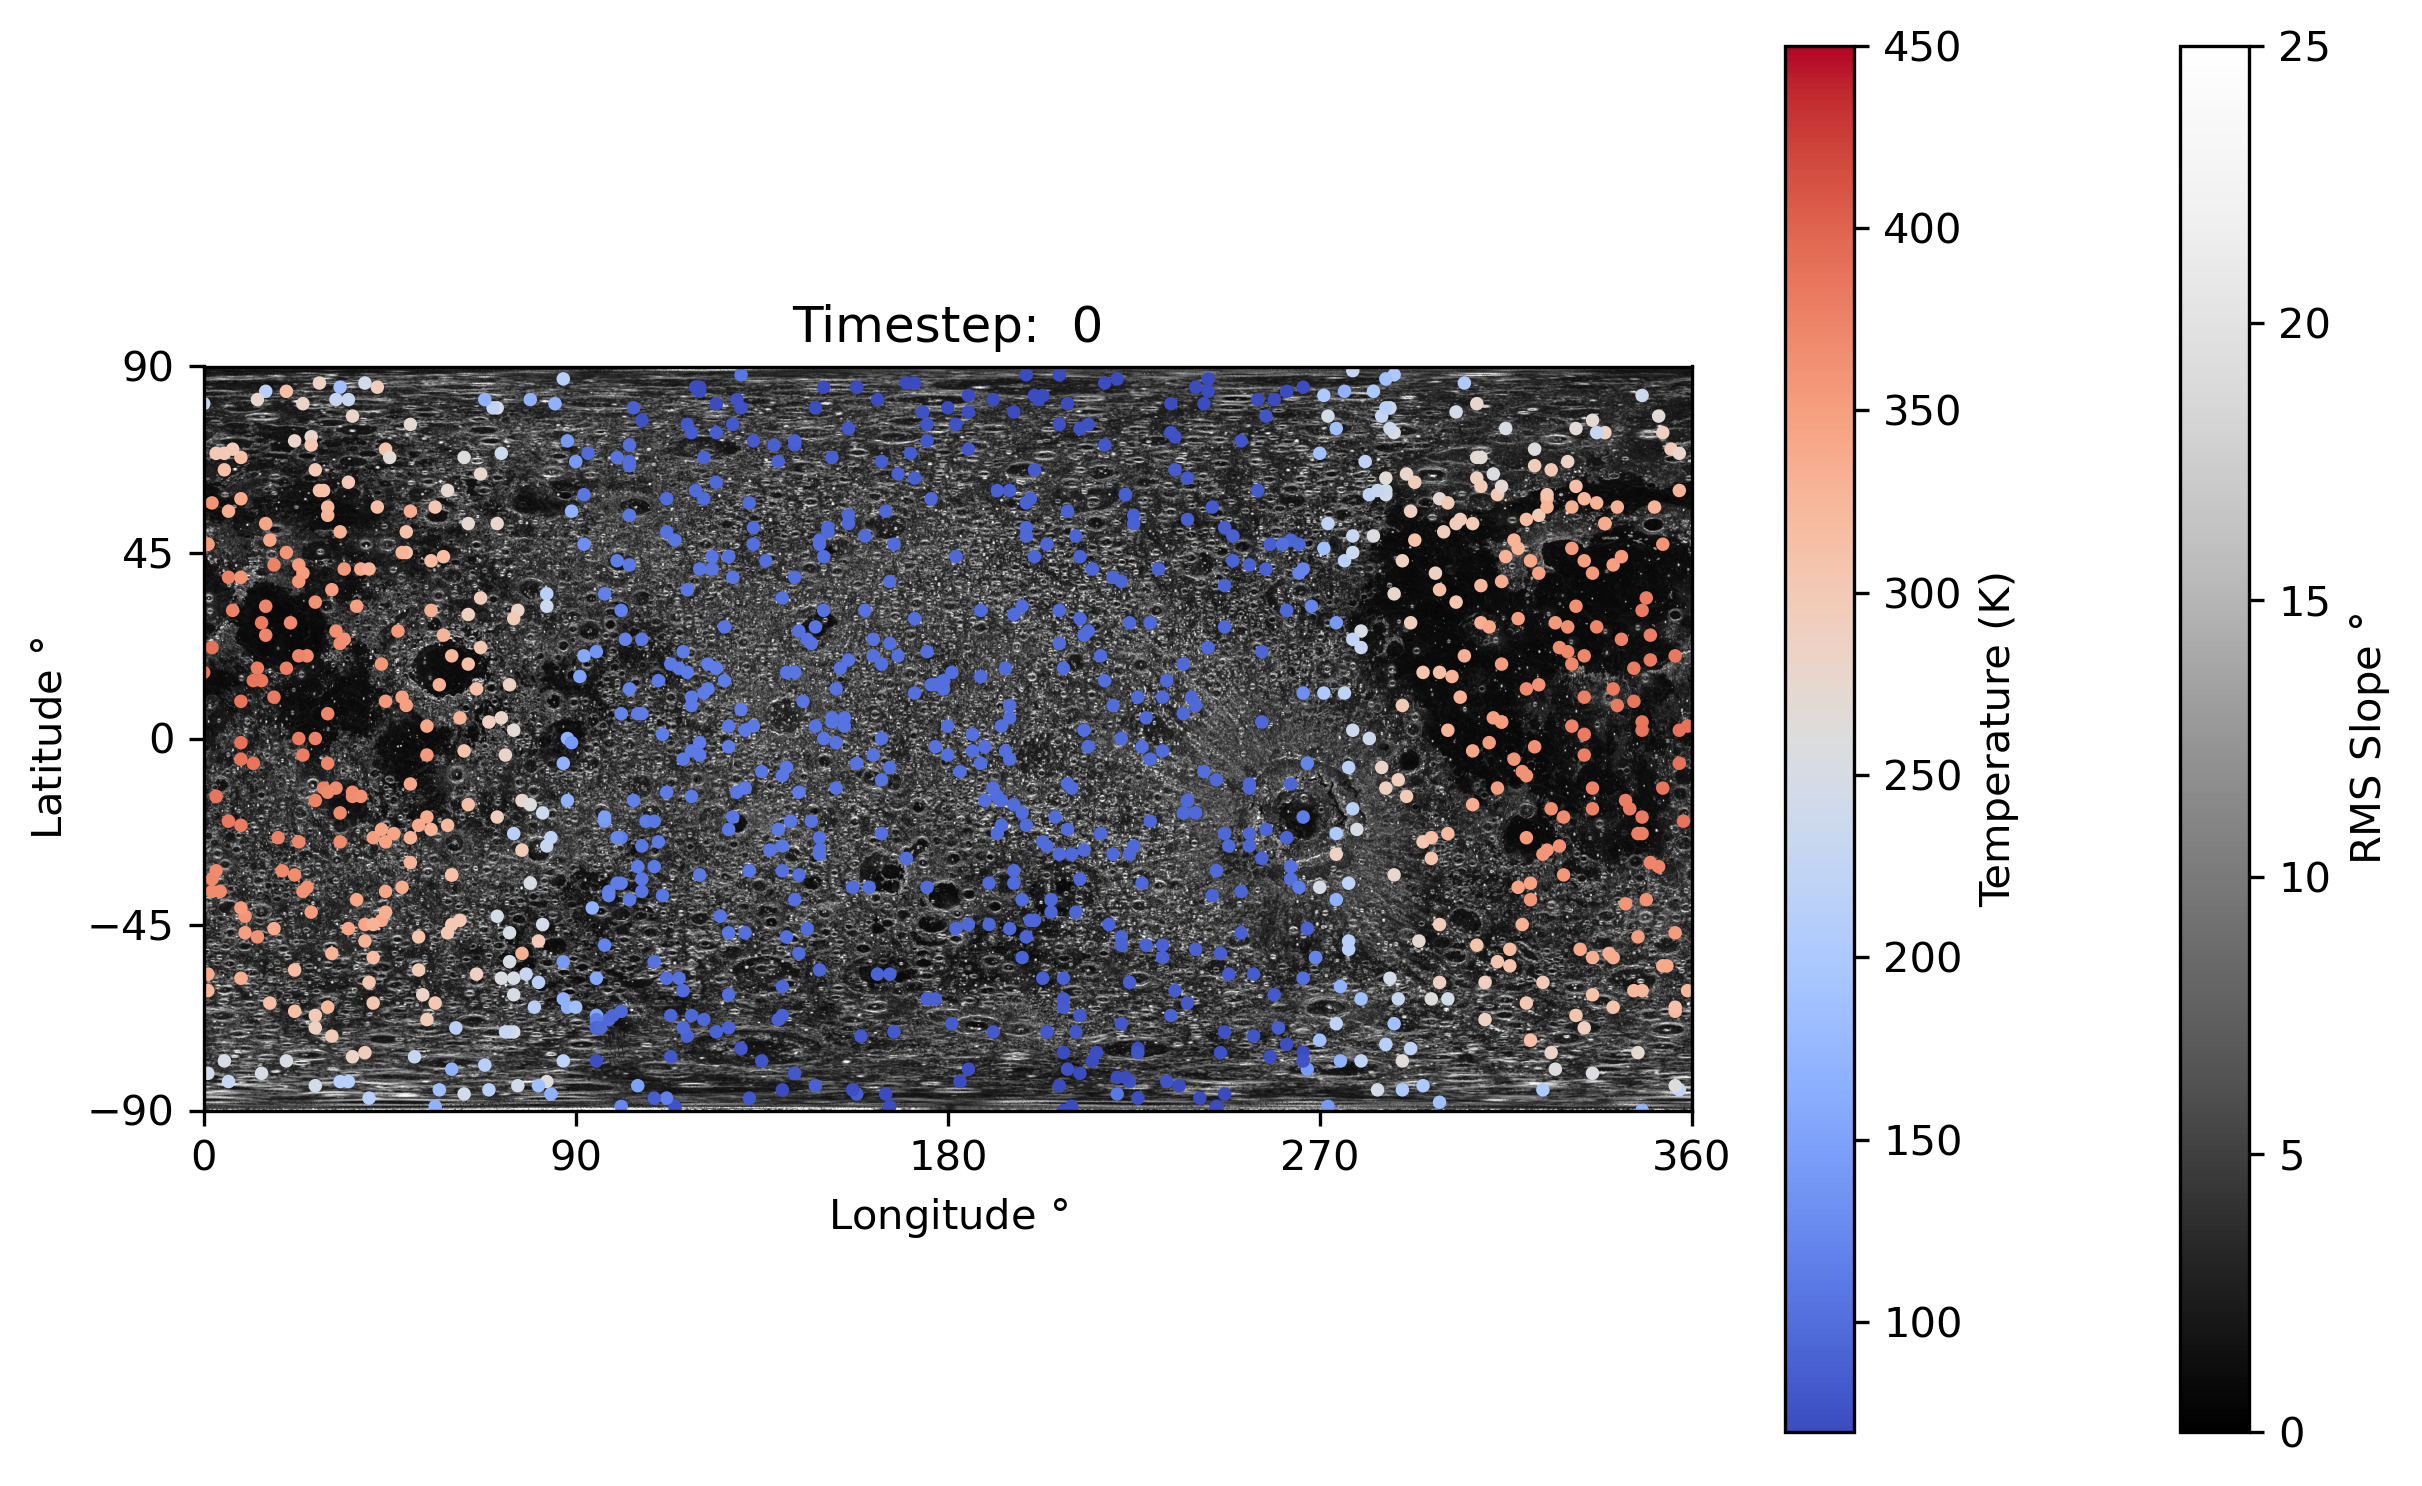

In [829]:
import lunar_processes as pr
roughmap = pr.omegas
t = 0
plt.figure(figsize=(10, 6), dpi=300)
plt.imshow(roughmap, cmap='Greys_r', vmin=0, vmax=25, extent=[0, 360, -90, 90])
plt.colorbar(label='RMS Slope $\degree$')

plt.scatter(np.rad2deg(roughmoon[:, 1, t]), np.rad2deg(roughmoon[:, 0, t]), c=roughmoon[:, 3, t], cmap='coolwarm', s=5, vmin=70, vmax=450)
plt.colorbar(label='Temperature (K)')
plt.ylabel('Latitude $\degree$')
plt.xlabel('Longitude $\degree$')
plt.ylim((-90, 90))
plt.xlim((0, 360))
plt.yticks([-90, -45, 0, 45, 90])
plt.xticks([0, 90, 180, 270, 360])
plt.title('Timestep: %2.0f'%t)
plt.show()

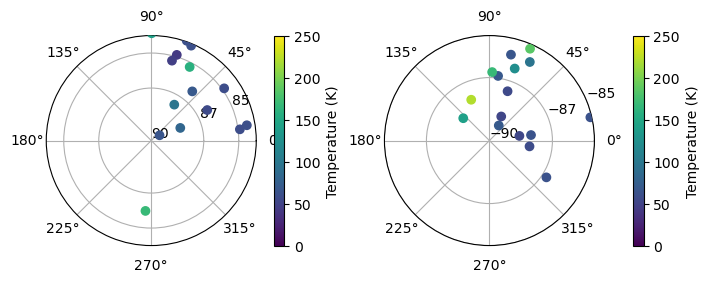

[[-86.10682817  73.00173195]
 [-86.7718594  170.27883442]
 [-84.33668948 242.40854343]
 [-85.75689012 234.17205876]
 [-84.39998089 229.08642184]]


In [657]:
tt = 49
fig = plt.figure(figsize=(10, 6), dpi=100)
ax = fig.add_subplot(211, projection='polar')
c = ax.scatter(roughmoon[:, 1, tt], np.rad2deg(roughmoon[:, 0, tt]), c=roughmoon[:, 3, tt], cmap='viridis', vmin=0, vmax=250, zorder=10)
ax.set_rticks([-90, -87, -85])
ax.set_ylim(-90, -85)
plt.colorbar(c, label='Temperature (K)')

ax2 = fig.add_subplot(221, projection='polar')
c2 = ax2.scatter(roughmoon[:, 1, tt], np.rad2deg(roughmoon[:, 0, tt]), c=roughmoon[:, 3, tt], cmap='viridis', vmin=0, vmax=250, zorder=10)
ax2.set_rticks([85, 87, 90])
ax2.set_ylim(90, 84)
plt.colorbar(c2, label='Temperature (K)')

plt.show()
mask = ~np.isnan(roughmoon[:, 1, 95])
mask2 = np.rad2deg(roughmoon[:, 0, 95][mask])<=-84
print(np.rad2deg(roughmoon[:, 0:2, 95])[mask][mask2])

In [673]:
# longest sit time
tot = np.zeros((1000))
for p in range(0, 1000):
    for i in range(0, 96):
        if roughmoon[p, 6, i] == 0:
            tot[p] +=1
        else:
            break
max_tot = np.argwhere(tot == max(tot))
print(roughmoon[max_tot, 6, :])
print(max(tot)*0.25)
print(max_tot)
print(np.rad2deg(roughmoon[max_tot, 0:2, 0]))
print(np.rad2deg(roughmoon[max_tot, 0:2, 49]))

[[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.
    7.  2.  4. nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]]]
12.5
[[692]]
[[[-15.  88.]]]
[[[-15.  88.]]]


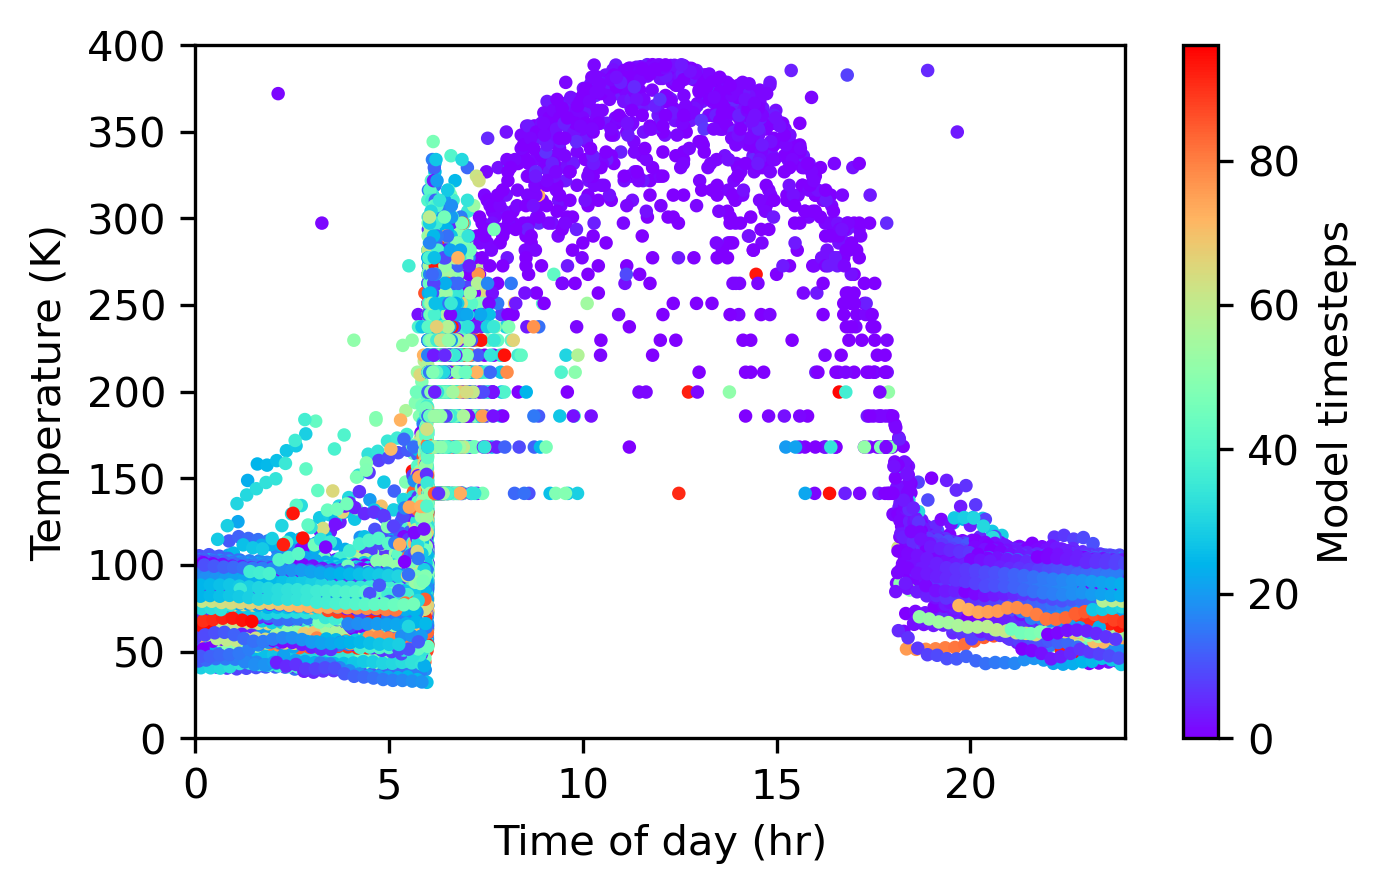

In [680]:
# temperature vs time of day
pp=692
plt.figure(figsize=(5, 3), dpi=300)
for pp in range(1000):
    plt.scatter(roughmoon[pp, 2, :], roughmoon[pp, 3, :], s=5, c=np.arange(0, 96, 1), cmap='rainbow', vmin=0, vmax=96)
plt.ylim((0, 400))
plt.ylabel('Temperature (K)')
plt.xlim((0, 24))
plt.xlabel('Time of day (hr)')
plt.colorbar(label='Model timesteps')
plt.show()

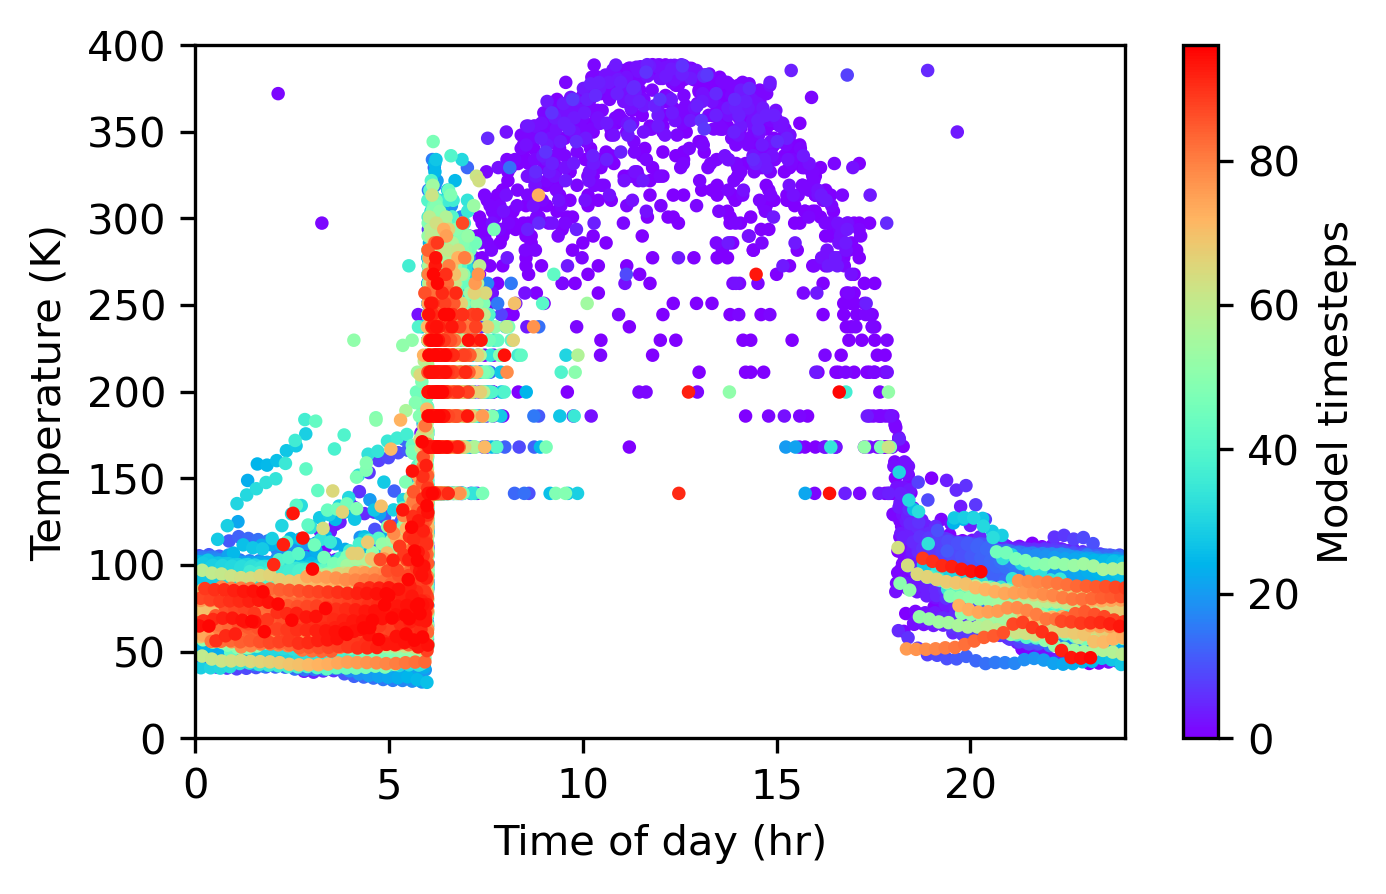

In [684]:

plt.figure(figsize=(5, 3), dpi=300)
for tt in range(96):
    plt.scatter(roughmoon[:, 2, tt], roughmoon[:, 3, tt], s=5, c=tt*np.ones((1000)), cmap='rainbow', vmin=0, vmax=96)
plt.ylim((0, 400))
plt.ylabel('Temperature (K)')
plt.xlim((0, 24))
plt.xlabel('Time of day (hr)')
plt.colorbar(label='Model timesteps')
plt.show()

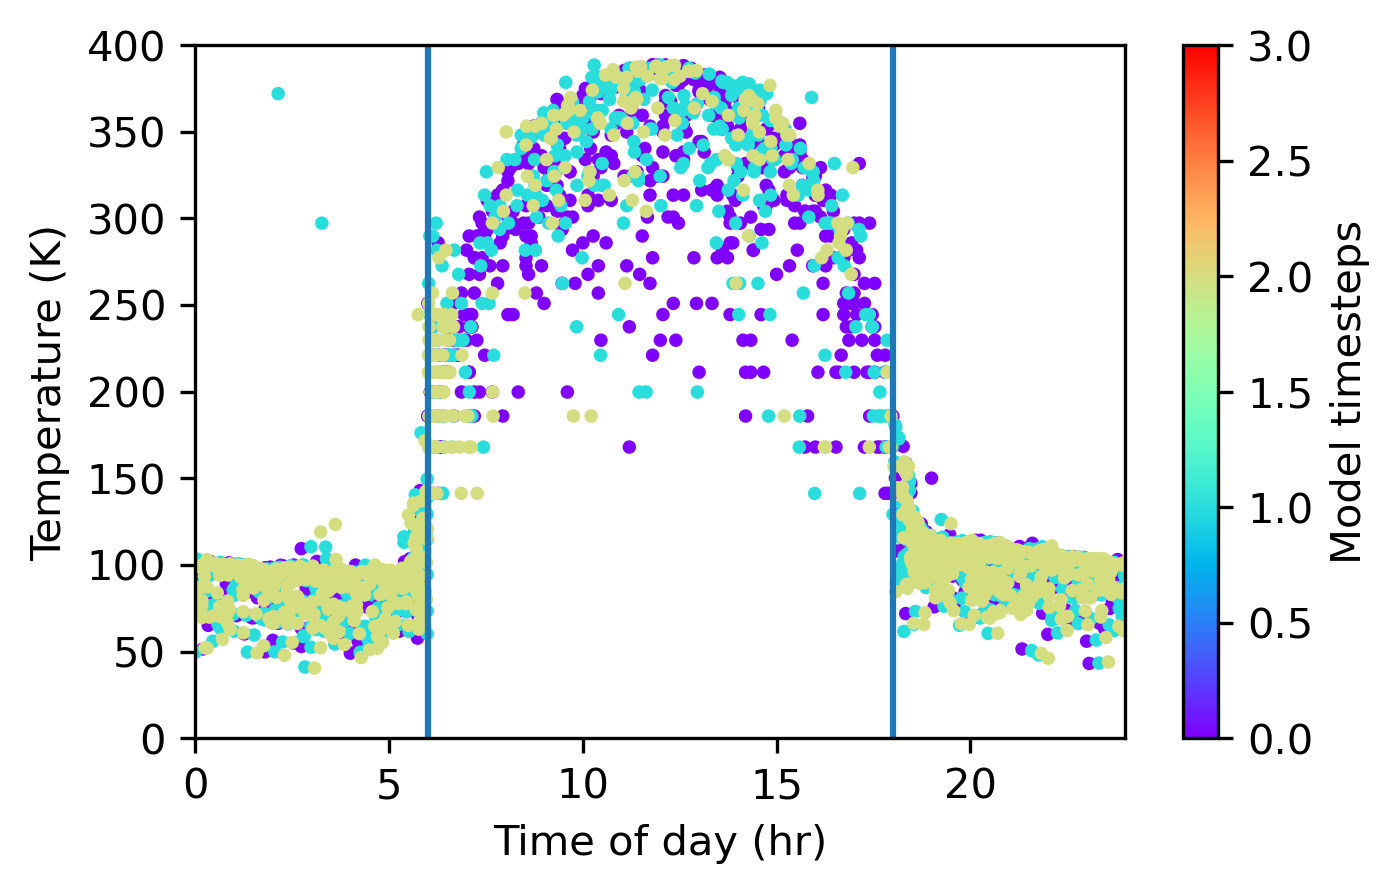

In [698]:
plt.figure(figsize=(5, 3), dpi=300)
for tt in range(0, 3):
    plt.scatter(roughmoon[:, 2, tt], roughmoon[:, 3, tt], s=5, c=tt*np.ones((1000)), cmap='rainbow', vmin=0, vmax=3)
plt.ylim((0, 400))
plt.ylabel('Temperature (K)')
plt.xlim((0, 24))
plt.xlabel('Time of day (hr)')
plt.colorbar(label='Model timesteps')
plt.vlines(6, 0, 400)
plt.vlines(18, 0, 400)

plt.show()

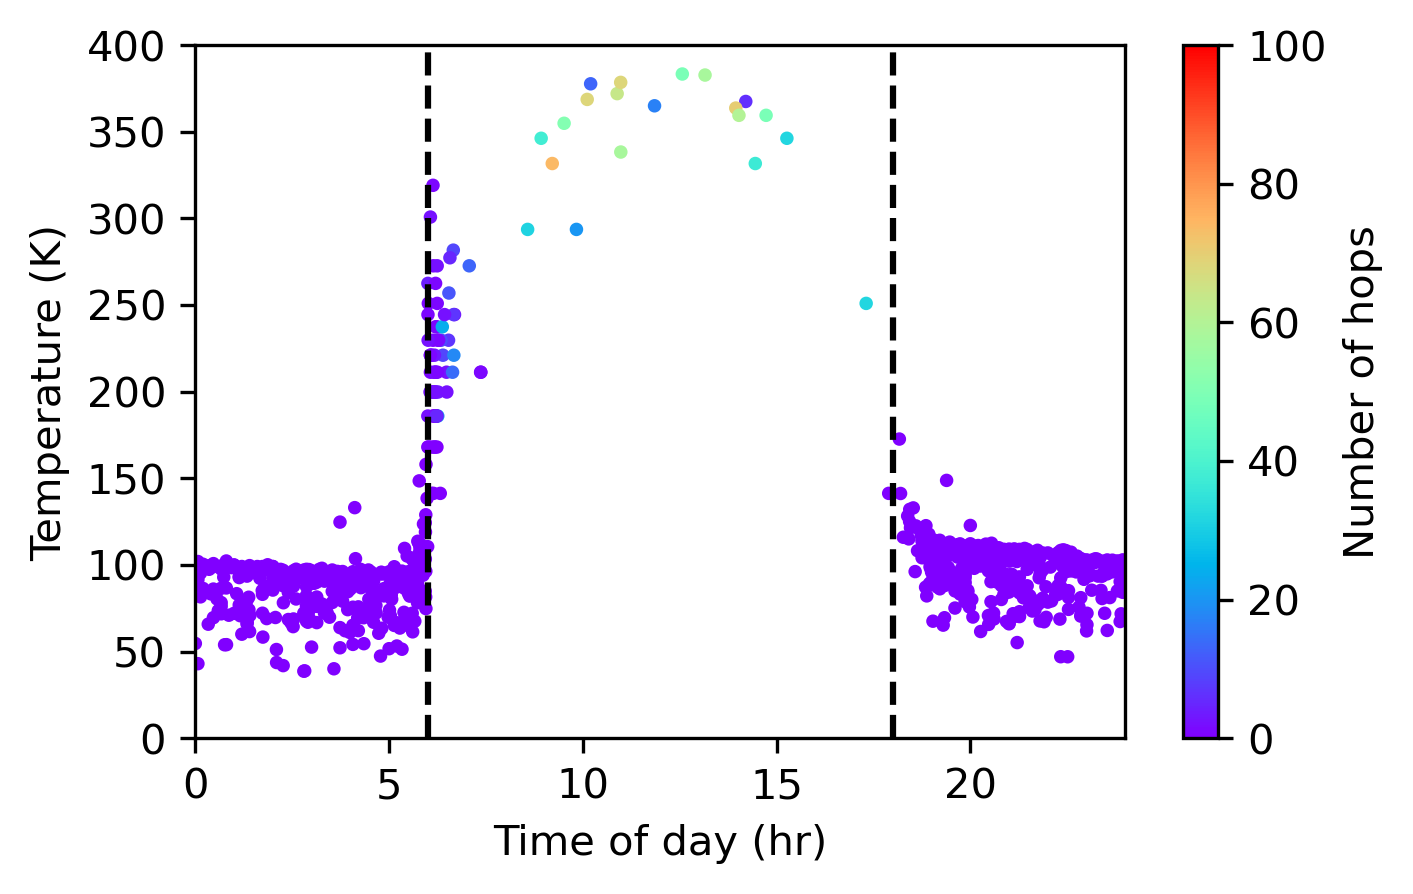

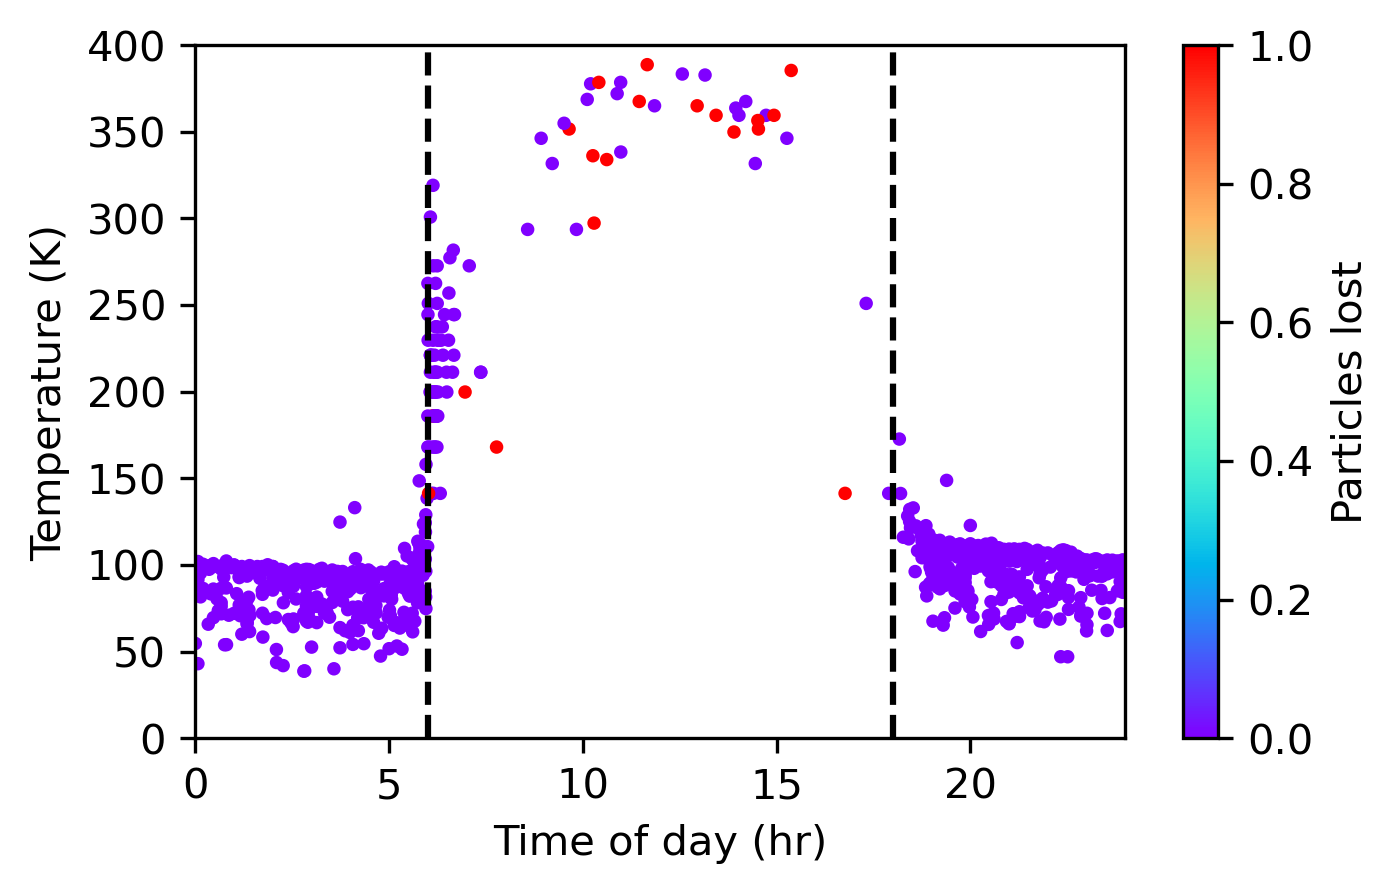

In [720]:
tt = 4

plt.figure(figsize=(5, 3), dpi=300)
plt.scatter(roughmoon[:, 2, tt], roughmoon[:, 3, tt], s=5, c=roughmoon[:, 6, tt], cmap='rainbow', vmin=0, vmax=100)
plt.ylim((0, 400))
plt.ylabel('Temperature (K)')
plt.xlim((0, 24))
plt.xlabel('Time of day (hr)')
plt.colorbar(label='Number of hops')
plt.vlines(6, 0, 400, colors='k', linestyle='dashed')
plt.vlines(18, 0, 400, colors='k', linestyle='dashed')
plt.show()

plt.figure(figsize=(5, 3), dpi=300)
plt.scatter(roughmoon[:, 2, tt], roughmoon[:, 3, tt], s=5, c=roughmoon[:, 4, tt], cmap='rainbow', vmin=0, vmax=1)
plt.ylim((0, 400))
plt.ylabel('Temperature (K)')
plt.xlim((0, 24))
plt.xlabel('Time of day (hr)')
plt.colorbar(label='Particles lost')
plt.vlines(6, 0, 400, colors='k', linestyle='dashed')
plt.vlines(18, 0, 400, colors='k', linestyle='dashed')
plt.show()

<BarContainer object of 25 artists>

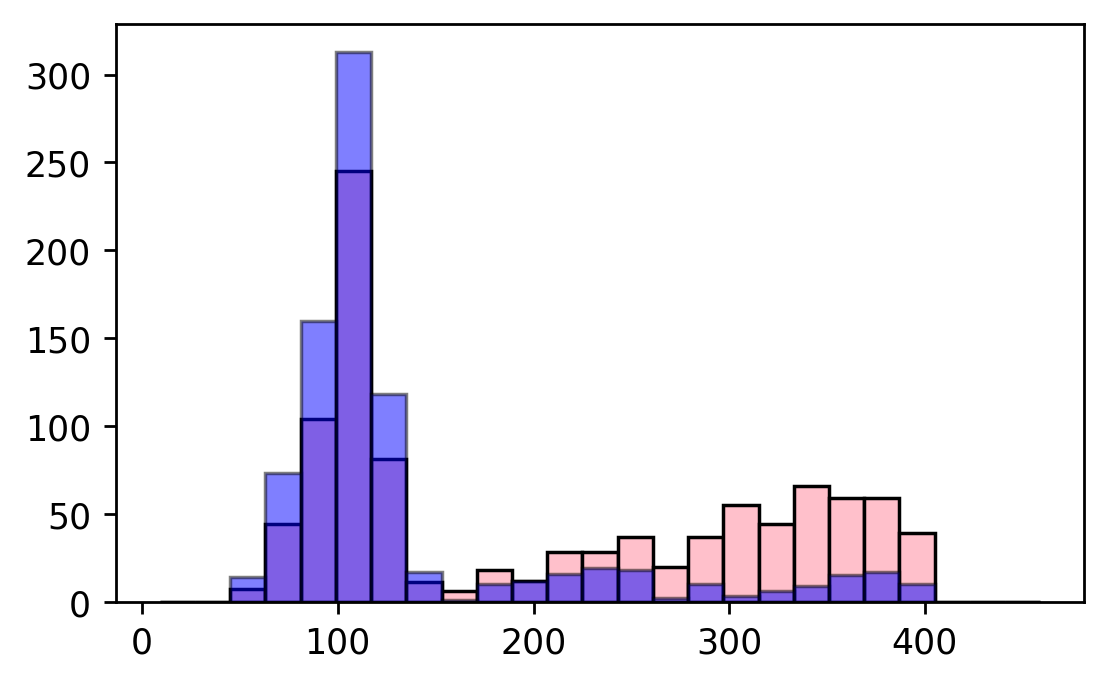

In [745]:
# temperature dependent recovery
# ibd vs tod with temp

# what is equivalent to this?
tt = 0
plt.figure(figsize=(5, 3), dpi=250)
hr, bedg = np.histogram(roughmoon[:, 3, tt], bins=25, range=(0, 450))
edge = np.array(bedg)[1:]
plt.bar(edge, hr, width=edge[1]-edge[0], facecolor='pink', edgecolor='k')
plt.show()



In [20]:
NP_sum_r, SP_sum_r = np.zeros((96)), np.zeros((96))
NP_sum_s, SP_sum_s = np.zeros((96)), np.zeros((96))
total_r, total_s = np.zeros((96)), np.zeros((96))
for tt in range(0, 96):
    NP_sum_r[tt] = sum(np.rad2deg(roughmoon[:, 0, tt])>=80)
    SP_sum_r[tt] = sum(np.rad2deg(roughmoon[:, 0, tt])<=-80)
    NP_sum_s[tt] = sum(np.rad2deg(smoothmoon[:, 0, tt])>=80)
    SP_sum_s[tt] = sum(np.rad2deg(smoothmoon[:, 0, tt])<=-80)
    total_r[tt] = sum(roughmoon[:, 4, tt] == 0)
    total_s[tt] = sum(smoothmoon[:, 4, tt] == 0)



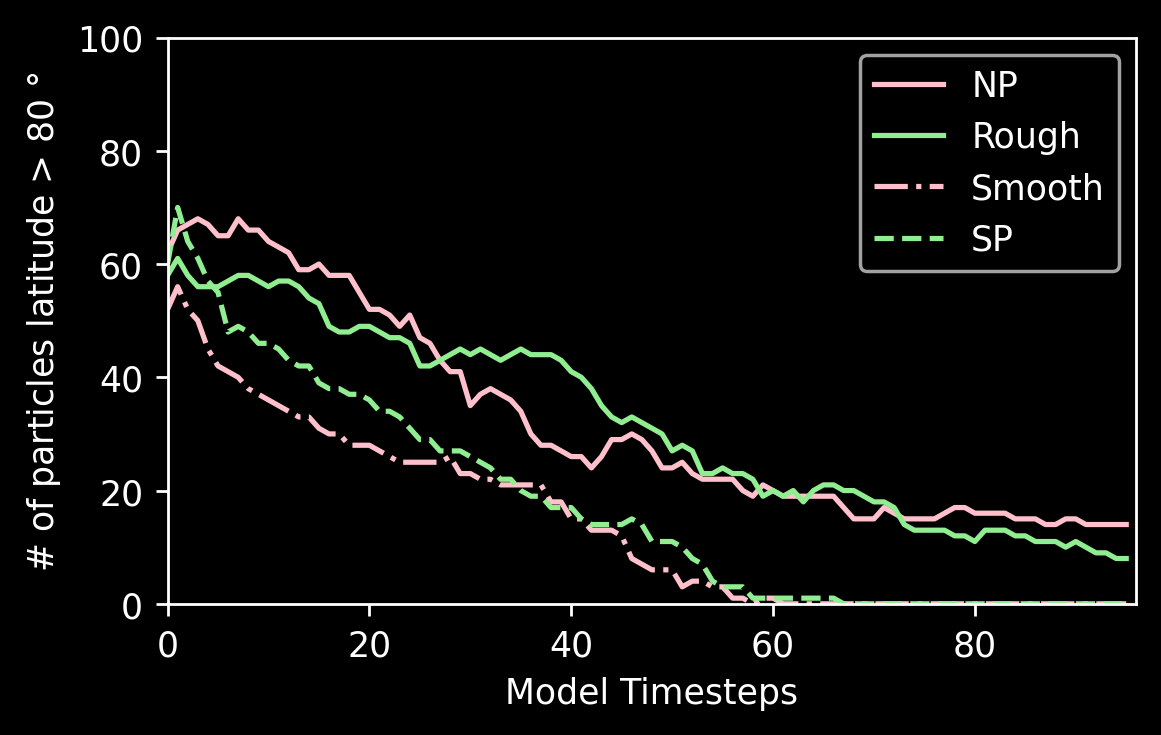

/var/folders/8b/58p6cy2n6_5dxsjpc6f4kp580000gn/T/ipykernel_35822/2588741740.py:17: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(np.arange(0, 96, 1), 100*NP_sum_s/total_s, c='darkred', label = 'Smooth', linestyle='dashdot')
/var/folders/8b/58p6cy2n6_5dxsjpc6f4kp580000gn/T/ipykernel_35822/2588741740.py:18: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(np.arange(0, 96, 1), 100*SP_sum_s/total_s, c='lightblue', label= 'SP', linestyle='dashed')


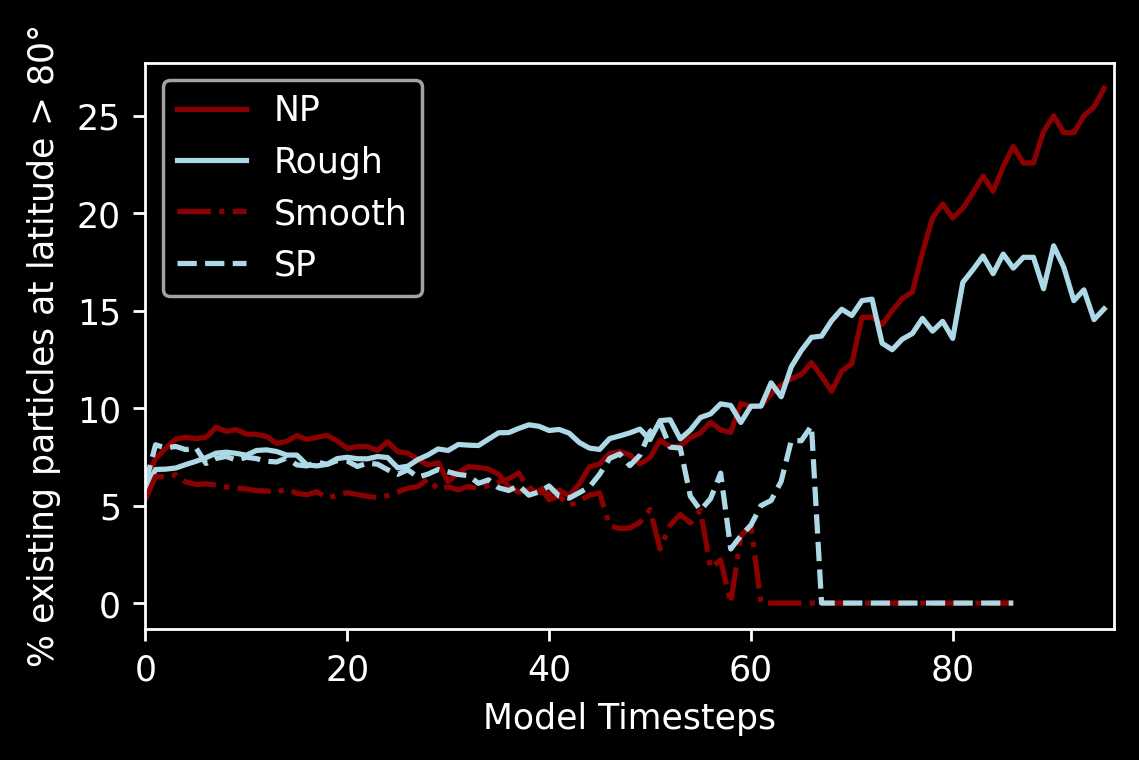

In [30]:
plt.style.use('dark_background')
plt.figure(figsize=(5, 3), dpi=250)
plt.plot(np.arange(0, 96, 1), NP_sum_r, c='pink', label='NP')
plt.plot(np.arange(0, 96, 1), SP_sum_r, c='lightgreen', label='Rough')
plt.plot(np.arange(0, 96, 1), NP_sum_s, c='pink', label = 'Smooth', linestyle='dashdot')
plt.plot(np.arange(0, 96, 1), SP_sum_s, c='lightgreen', label= 'SP', linestyle='dashed')
plt.ylabel('# of particles latitude > 80 $\degree$')
plt.ylim((0, 100))
plt.xlabel('Model Timesteps')
plt.xlim((0, 96))
plt.legend()
plt.show()

plt.figure(figsize=(5, 3), dpi=250)
plt.plot(np.arange(0, 96, 1), 100*NP_sum_r/total_r, c='darkred', label='NP')
plt.plot(np.arange(0, 96, 1), 100*SP_sum_r/total_r, c='lightblue', label='Rough')
plt.plot(np.arange(0, 96, 1), 100*NP_sum_s/total_s, c='darkred', label = 'Smooth', linestyle='dashdot')
plt.plot(np.arange(0, 96, 1), 100*SP_sum_s/total_s, c='lightblue', label= 'SP', linestyle='dashed')
plt.ylabel('% existing particles at latitude > 80$\degree$')
#plt.ylim((0, 100))
plt.xlabel('Model Timesteps')
plt.xlim((0, 96))
plt.legend()
plt.show()

In [809]:
# what is the average survival time?
survtime_r = np.zeros((1000))
survtime_s = np.zeros((1000))

for p in range(1000):
    if roughmoon[p, 4, -1] != 0:
        iloc = np.argwhere(roughmoon[p, 4, :] == 1)[0]
        survtime_r[p] = iloc[0]
    else:
        survtime_r[p] = 100
    if smoothmoon[p,  4, -1] !=0: 
        iloc = np.argwhere(smoothmoon[p, 4, :] == 1)[0]
        survtime_s[p] = iloc[0]
    else:
        survtime_s[p] = 100
        

print(np.average(survtime_s), np.std(survtime_s))
print(np.average(survtime_r), np.std(survtime_r))
print(np.max(survtime_s), np.max(survtime_r))

print(np.count_nonzero(survtime_r == 100))

print('Percent of molecules lost by end of simulation (Rough): %2.4f '%(100*(np.count_nonzero(survtime_r == 100))/1000))

24.0 20.390733189368156
36.919 28.530763028702896
87.0 100.0
53
Percent of molecules lost by end of simulation (Rough): 5.3000 


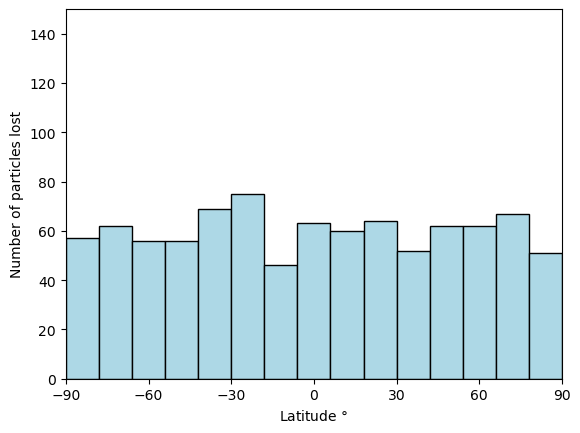

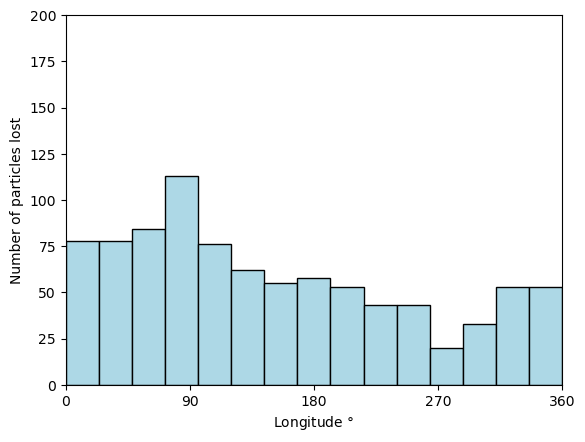

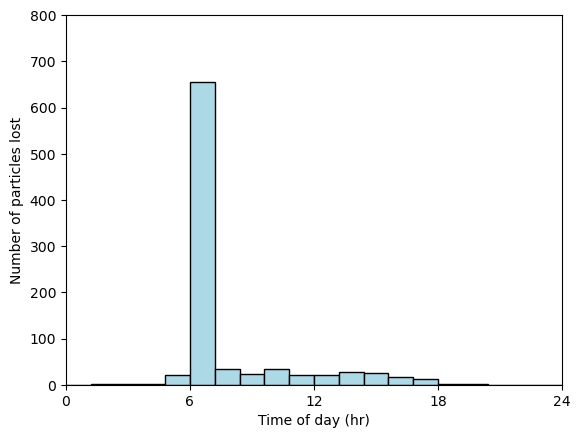

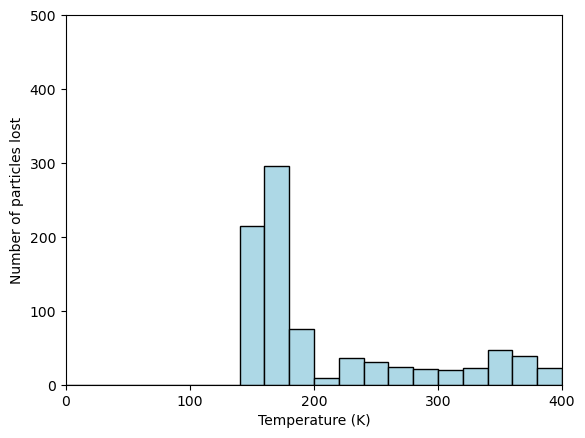

Rough Moon loss percent: 5.3


In [828]:
# where are particles lost from?
mask = roughmoon[:, 4, :] == 1
lat = np.rad2deg(roughmoon[:, 0, :][mask])
lon = np.rad2deg(roughmoon[:, 1, :][mask])
tod = roughmoon[:, 2, :][mask]
tem = roughmoon[:, 3, :][mask]

his, edge = np.histogram(lat, bins=15, range=(-90, 90))
edge = np.array(edge)[1:]
wid =  edge[1]-edge[0]
plt.bar(edge-wid/2, his, width =wid, edgecolor='k', facecolor='lightblue')
plt.ylim((0, 150))
plt.xlim((-90, 90))
plt.xticks([-90, -60, -30, 0, 30, 60, 90])
plt.xlabel('Latitude $\degree$')
plt.ylabel('Number of particles lost')
plt.show()

his, edge = np.histogram(lon, bins=15, range=(0, 360))
edge = np.array(edge)[1:]
wid =  edge[1]-edge[0]
plt.bar(edge-wid/2, his, width = wid, edgecolor='k', facecolor='lightblue')
plt.ylim((0, 200))
plt.xlim((0, 360))
plt.xticks([0, 90, 180, 270, 360])
plt.xlabel('Longitude $\degree$')
plt.ylabel('Number of particles lost')
plt.show()

his, edge = np.histogram(tod, bins=20, range=(0, 24))
edge = np.array(edge)[1:]
wid =  edge[1]-edge[0]
plt.bar(edge-wid/2, his, width =wid, edgecolor='k', facecolor='lightblue')
plt.ylim((0, 800))
plt.xlim((0, 24))
plt.xticks([0, 6, 12, 18, 24])
plt.xlabel('Time of day (hr)')
plt.ylabel('Number of particles lost')
plt.show()

his, edge = np.histogram(tem, bins=20, range=(0, 400))
edge = np.array(edge)[1:]
wid =  edge[1]-edge[0]
plt.bar(edge-wid/2, his, width =wid, edgecolor='k', facecolor='lightblue')
plt.ylim((0, 500))
plt.xlim((50, 400))
plt.xticks([0, 100, 200, 300, 400])
plt.xlabel('Temperature (K)')
plt.ylabel('Number of particles lost')
plt.show()


# how many particles are lost?
sum_loss = np.zeros((1000))
for i in range(1000):
    sum_loss[i] = sum(mask[i, :])

print('Rough Moon loss percent: %2.1f'%(((1000-sum(sum_loss))/1000)*100))


In [799]:
# temperature vs time of day
bb

947.0
0.053


1.5707963267948966
90.0


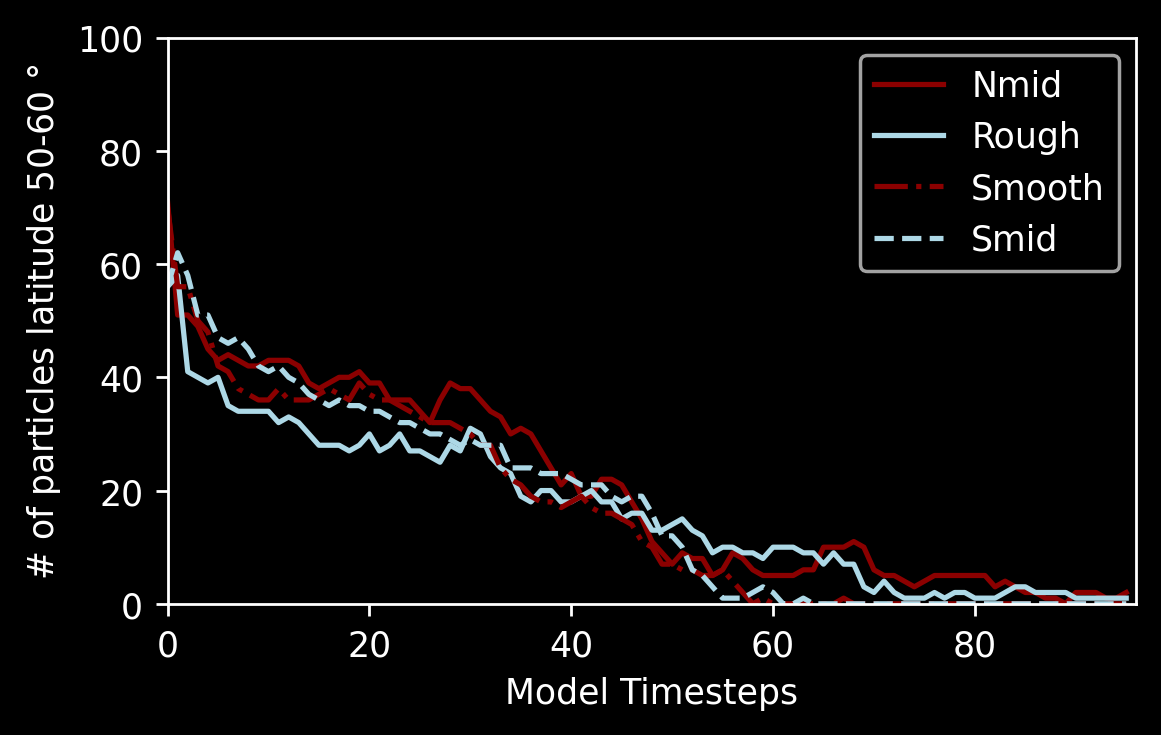

/var/folders/8b/58p6cy2n6_5dxsjpc6f4kp580000gn/T/ipykernel_35822/3731318594.py:30: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(np.arange(0, 96, 1), 100*Nmid_sum_s/total_s, c='darkred', label = 'Smooth', linestyle='dashdot')
/var/folders/8b/58p6cy2n6_5dxsjpc6f4kp580000gn/T/ipykernel_35822/3731318594.py:31: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(np.arange(0, 96, 1), 100*Smid_sum_s/total_s, c='lightblue', label= 'Smid', linestyle='dashed')


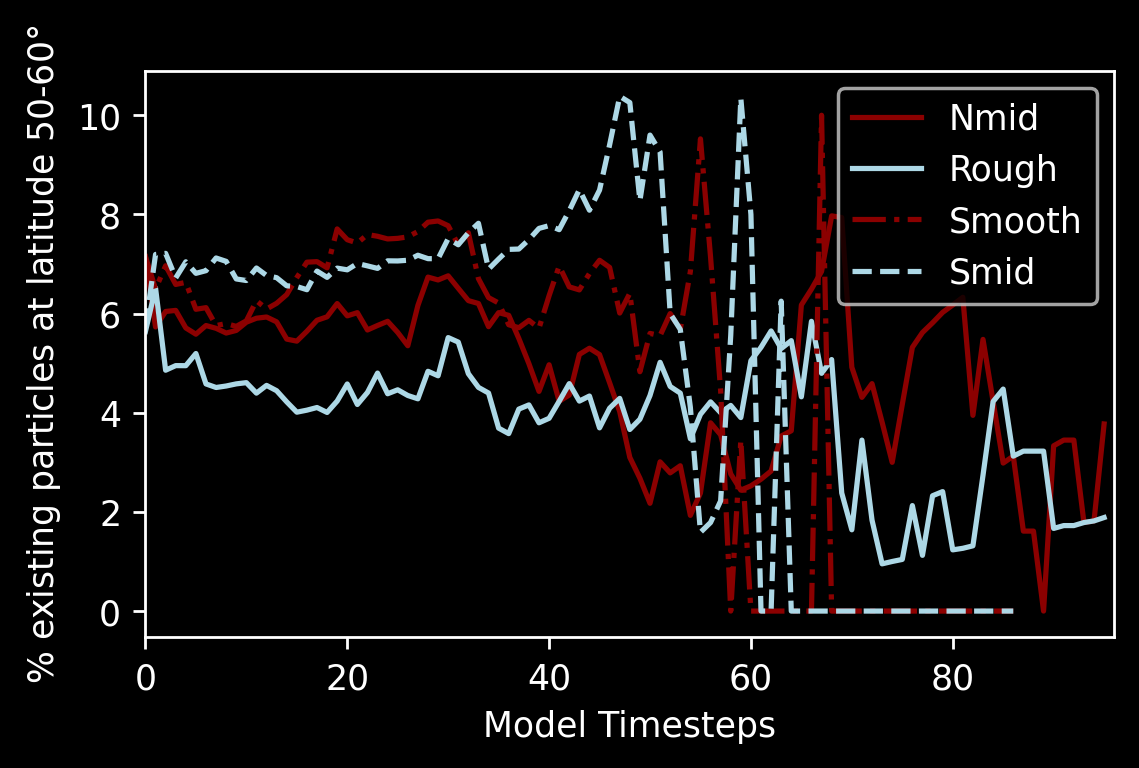

In [34]:
Nmid_sum_r, Smid_sum_r = np.zeros((96)), np.zeros((96))
Nmid_sum_s, Smid_sum_s = np.zeros((96)), np.zeros((96))
total_r, total_s = np.zeros((96)), np.zeros((96))
for tt in range(0, 96):
    Nmid_sum_r[tt] = sum((np.rad2deg(roughmoon[:, 0, tt])<=60)&(np.rad2deg(roughmoon[:, 0, tt])>=50))
    Smid_sum_r[tt] = sum((np.rad2deg(roughmoon[:, 0, tt])>=-60)&(np.rad2deg(roughmoon[:, 0, tt])<=-50))
    Nmid_sum_s[tt] = sum((np.rad2deg(smoothmoon[:, 0, tt])<=60)&(np.rad2deg(smoothmoon[:, 0, tt])>=50))
    Smid_sum_s[tt] = sum((np.rad2deg(smoothmoon[:, 0, tt])>=-60)&(np.rad2deg(smoothmoon[:, 0, tt])<=-50))
    total_r[tt] = sum(roughmoon[:, 4, tt] == 0)
    total_s[tt] = sum(smoothmoon[:, 4, tt] == 0)



plt.style.use('dark_background')
plt.figure(figsize=(5, 3), dpi=250)
plt.plot(np.arange(0, 96, 1), Nmid_sum_r, c='darkred', label='Nmid')
plt.plot(np.arange(0, 96, 1), Smid_sum_r, c='lightblue', label='Rough')
plt.plot(np.arange(0, 96, 1), Nmid_sum_s, c='darkred', label = 'Smooth', linestyle='dashdot')
plt.plot(np.arange(0, 96, 1), Smid_sum_s, c='lightblue', label= 'Smid', linestyle='dashed')
plt.ylabel('# of particles latitude 50-60 $\degree$')
plt.ylim((0, 100))
plt.xlabel('Model Timesteps')
plt.xlim((0, 96))
plt.legend()
plt.show()

plt.figure(figsize=(5, 3), dpi=250)
plt.plot(np.arange(0, 96, 1), 100*Nmid_sum_r/total_r, c='darkred', label='Nmid')
plt.plot(np.arange(0, 96, 1), 100*Smid_sum_r/total_r, c='lightblue', label='Rough')
plt.plot(np.arange(0, 96, 1), 100*Nmid_sum_s/total_s, c='darkred', label = 'Smooth', linestyle='dashdot')
plt.plot(np.arange(0, 96, 1), 100*Smid_sum_s/total_s, c='lightblue', label= 'Smid', linestyle='dashed')
plt.ylabel('% existing particles at latitude 50-60$\degree$')
#plt.ylim((0, 100))
plt.xlabel('Model Timesteps')
plt.xlim((0, 96))
plt.legend()
plt.show()

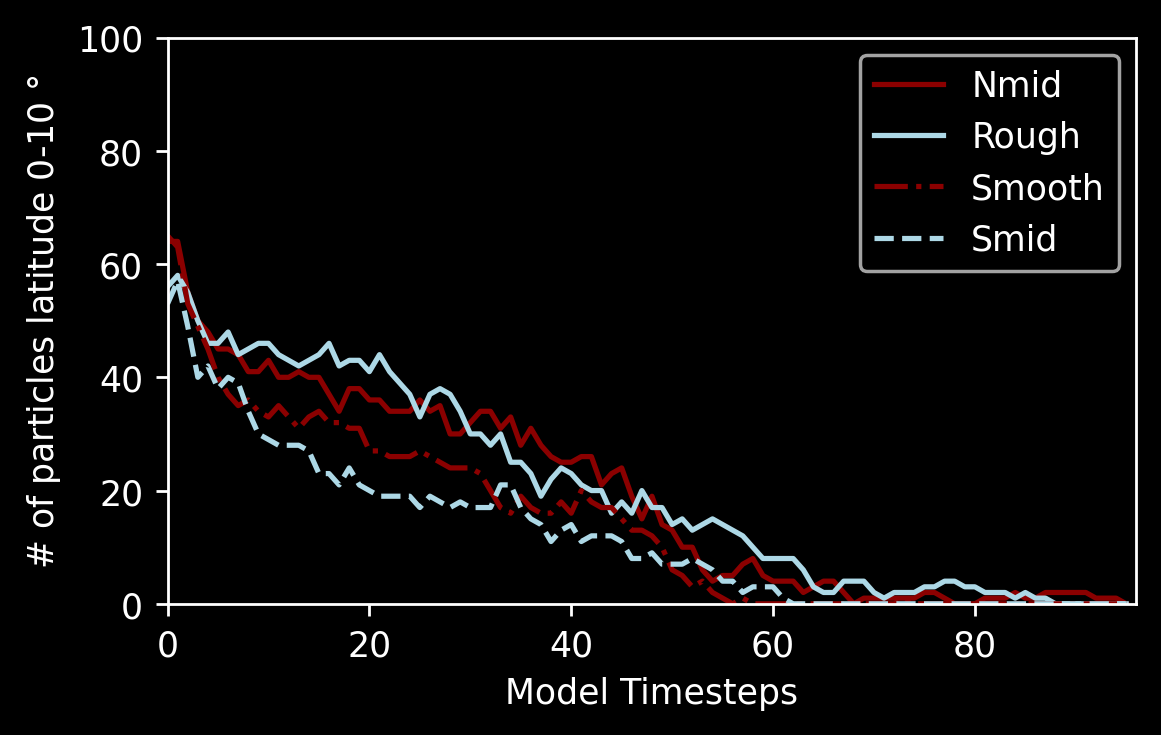

/var/folders/8b/58p6cy2n6_5dxsjpc6f4kp580000gn/T/ipykernel_35822/1963774347.py:30: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(np.arange(0, 96, 1), 100*Neq_sum_s/total_s, c='darkred', label = 'Smooth', linestyle='dashdot')
/var/folders/8b/58p6cy2n6_5dxsjpc6f4kp580000gn/T/ipykernel_35822/1963774347.py:31: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(np.arange(0, 96, 1), 100*Seq_sum_s/total_s, c='lightblue', label= 'Smid', linestyle='dashed')


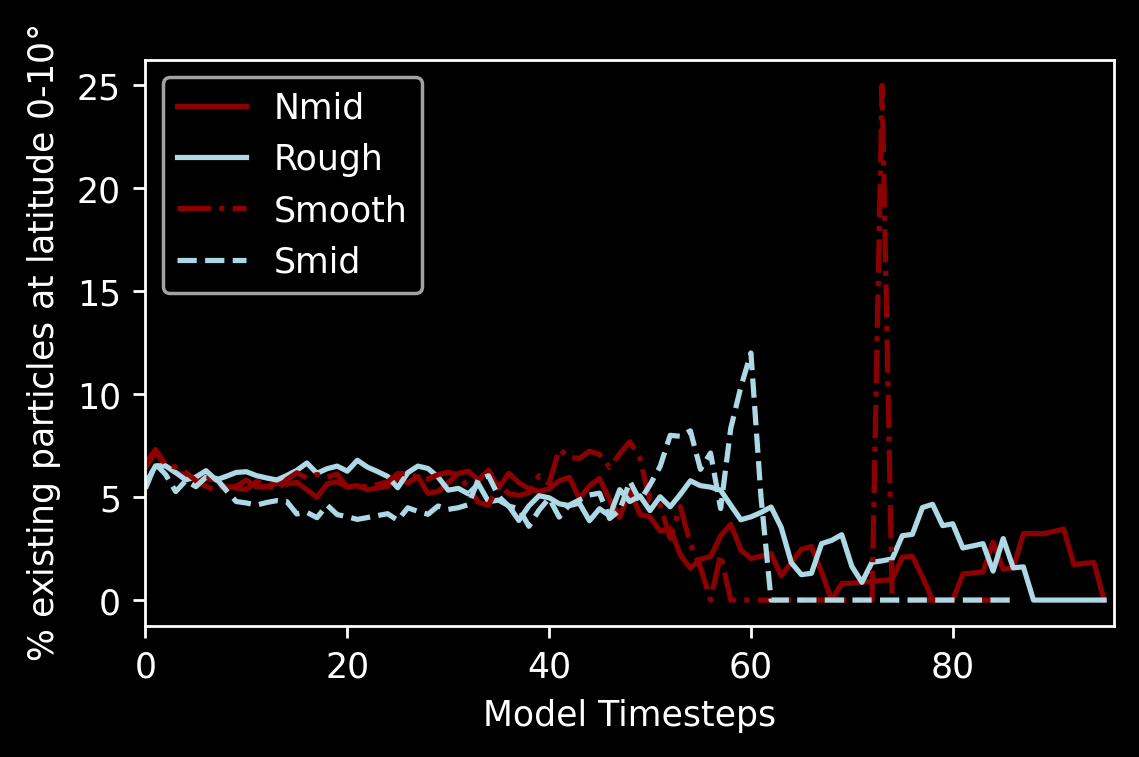

In [36]:
Neq_sum_r, Seq_sum_r = np.zeros((96)), np.zeros((96))
Neq_sum_s, Seq_sum_s = np.zeros((96)), np.zeros((96))
total_r, total_s = np.zeros((96)), np.zeros((96))
for tt in range(0, 96):
    Neq_sum_r[tt] = sum((np.rad2deg(roughmoon[:, 0, tt])>=0)&(np.rad2deg(roughmoon[:, 0, tt])<=10))
    Seq_sum_r[tt] = sum((np.rad2deg(roughmoon[:, 0, tt])<=0)&(np.rad2deg(roughmoon[:, 0, tt])>=-10))
    Neq_sum_s[tt] = sum((np.rad2deg(smoothmoon[:, 0, tt])>=0)&(np.rad2deg(smoothmoon[:, 0, tt])<=10))
    Seq_sum_s[tt] = sum((np.rad2deg(smoothmoon[:, 0, tt])<=0)&(np.rad2deg(smoothmoon[:, 0, tt])>=-10))
    total_r[tt] = sum(roughmoon[:, 4, tt] == 0)
    total_s[tt] = sum(smoothmoon[:, 4, tt] == 0)



plt.style.use('dark_background')
plt.figure(figsize=(5, 3), dpi=250)
plt.plot(np.arange(0, 96, 1), Neq_sum_r, c='darkred', label='Neq')
plt.plot(np.arange(0, 96, 1), Seq_sum_r, c='lightblue', label='Rough')
plt.plot(np.arange(0, 96, 1), Neq_sum_s, c='darkred', label = 'Smooth', linestyle='dashdot')
plt.plot(np.arange(0, 96, 1), Seq_sum_s, c='lightblue', label= 'Seq', linestyle='dashed')
plt.ylabel('# of particles latitude 0-10 $\degree$')
plt.ylim((0, 100))
plt.xlabel('Model Timesteps')
plt.xlim((0, 96))
plt.legend()
plt.show()

plt.figure(figsize=(5, 3), dpi=250)
plt.plot(np.arange(0, 96, 1), 100*Neq_sum_r/total_r, c='darkred', label='Neq')
plt.plot(np.arange(0, 96, 1), 100*Seq_sum_r/total_r, c='lightblue', label='Rough')
plt.plot(np.arange(0, 96, 1), 100*Neq_sum_s/total_s, c='darkred', label = 'Smooth', linestyle='dashdot')
plt.plot(np.arange(0, 96, 1), 100*Seq_sum_s/total_s, c='lightblue', label= 'Seq', linestyle='dashed')
plt.ylabel('% existing particles at latitude 0-10$\degree$')
#plt.ylim((0, 100))
plt.xlabel('Model Timesteps')
plt.xlim((0, 96))
plt.legend()
plt.show()